### 주식 예측 도전

#### 삼성전자, SK 하이닉스, 네이버의 5년 간 주가 데이터를 가지고 시계열 데이터 분석, 미래 예측을 수행합니다.
<br/>

1 데이터 준비
- 파일 가져오기
- 데이터 확인
- 결측치 확인

2 시계열 정상성 찾기
- 시계열 정상성 그래프 확인
- 시계열 정상성 통계적 지표 확인 (ADF Test)
- 로그 변환
- 시계열 분해

3 모델링
- 모델 개요
- 모델의 파라미터 설정
- 훈련/시험 데이터 분리
- 모델 훈련 및 예측
- 결과 평가 지표

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 4

</br>
**파일 가져오기**

* 삼성전자, SK 하이닉스, 네이버 세 종목의 5년 간 자료

In [232]:
# 경로 설정
Samsung_Electronics_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
Sk_Hynix_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/000660.KS.csv'
Naver_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/035420.KS.csv'

# 데이터 저장
Samsung_Electronics_df = pd.read_csv(Samsung_Electronics_filepath)
Sk_Hynix_df = pd.read_csv(Sk_Hynix_filepath)
Naver_df = pd.read_csv(Naver_filepath)

In [233]:
# 미리보기
Samsung_Electronics_df.head()

Date     Open     High      Low    Close     Adj Close    Volume
0  2017-02-10  38400.0  38760.0  38300.0  38360.0  33288.699219  11020750
1  2017-02-13  37740.0  38060.0  37720.0  37960.0  32941.578125  11102050
2  2017-02-14  37960.0  38260.0  37320.0  37580.0  32611.810547  13124150
3  2017-02-15  37080.0  37960.0  37080.0  37720.0  32733.308594  14191550
4  2017-02-16  37800.0  38360.0  37780.0  38020.0  32993.640625  10226350

In [234]:
# 미리보기
Sk_Hynix_df.head()

Date     Open     High      Low    Close     Adj Close   Volume
0  2017-02-10  52000.0  52200.0  50000.0  50000.0  46534.972656  9120878
1  2017-02-13  49550.0  51000.0  49500.0  50700.0  47186.464844  4124290
2  2017-02-14  51100.0  51600.0  48100.0  48450.0  45092.394531  8593878
3  2017-02-15  48300.0  48700.0  47550.0  47900.0  44580.507813  8725221
4  2017-02-16  48350.0  49600.0  48200.0  49600.0  46162.699219  4840918

In [235]:
# 미리보기
Naver_df.head()

Date      Open      High       Low     Close      Adj Close  Volume
0  2017-02-10  159000.0  159000.0  157400.0  159000.0  157556.703125  337445
1  2017-02-13  160000.0  160600.0  157600.0  159000.0  157556.703125  296900
2  2017-02-14  157000.0  158000.0  153200.0  154000.0  152602.093750  599535
3  2017-02-15  153800.0  155400.0  153600.0  154600.0  153196.656250  332175
4  2017-02-16  154000.0  155400.0  153800.0  155400.0  153989.390625  369105

* 'Date'를 기준으로 'Close'(종료 가격)의 시계열 데이터 생성

In [236]:
# 날짜 인덱스 설정
Samsung_Electronics_df = pd.read_csv(Samsung_Electronics_filepath, index_col = 'Date', parse_dates = True)
Sk_Hynix_df = pd.read_csv(Sk_Hynix_filepath, index_col = 'Date', parse_dates = True)
Naver_df = pd.read_csv(Naver_filepath, index_col = 'Date', parse_dates = True)

# 타임 시리즈 저장
Samsung_Electronics_ts = Samsung_Electronics_df['Close']
Sk_Hynix_ts = Sk_Hynix_df['Close']
Naver_ts = Naver_df['Close']

In [237]:
# 미리보기
Samsung_Electronics_ts.head()

Date
2017-02-10    38360.0
2017-02-13    37960.0
2017-02-14    37580.0
2017-02-15    37720.0
2017-02-16    38020.0
Name: Close, dtype: float64

In [238]:
# 미리보기
Sk_Hynix_ts.head()

Date
2017-02-10    50000.0
2017-02-13    50700.0
2017-02-14    48450.0
2017-02-15    47900.0
2017-02-16    49600.0
Name: Close, dtype: float64

In [239]:
# 미리보기
Naver_ts.head()

Date
2017-02-10    159000.0
2017-02-13    159000.0
2017-02-14    154000.0
2017-02-15    154600.0
2017-02-16    155400.0
Name: Close, dtype: float64

</br>
**데이터 확인**

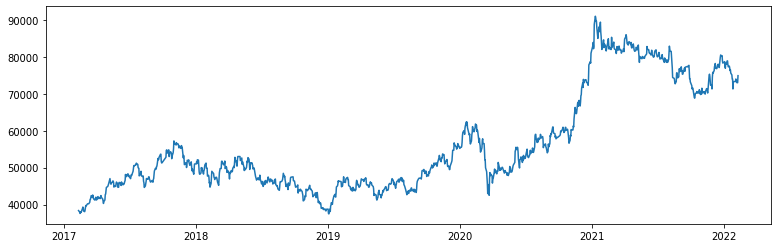

In [240]:
# 삼성전자 분포 확인
plt.plot(Samsung_Electronics_ts)

* 비정상성 시계열, 시간에 따라 상승하는 추세

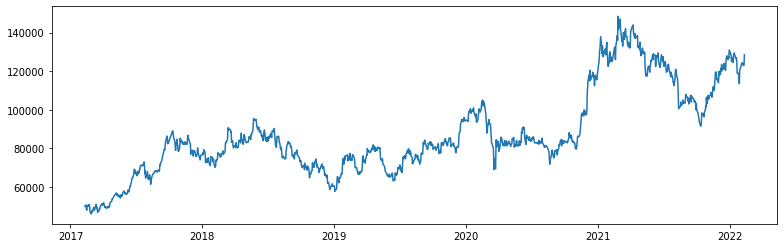

In [241]:
# SK 하이닉스 분포 확인
plt.plot(Sk_Hynix_ts)

* 비정상성 시계열, 시간에 따라 상승하는 추세

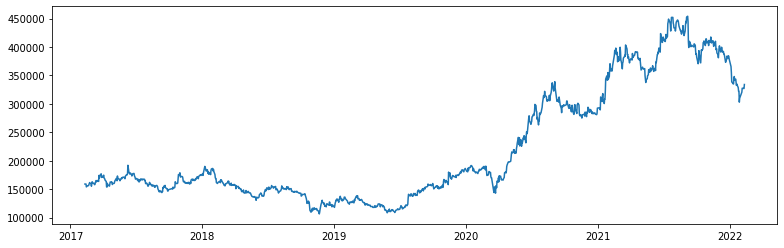

In [242]:
# 네이버 분포 확인
plt.plot(Naver_ts)

* 비정상성 시계열, 일정 시기를 기준으로 급상승

</br>
**결측치 확인**

In [243]:
Samsung_Electronics_ts[Samsung_Electronics_ts.isna()]

Series([], Name: Close, dtype: float64)

In [244]:
Sk_Hynix_ts[Sk_Hynix_ts.isna()]

Series([], Name: Close, dtype: float64)

In [245]:
Naver_ts[Naver_ts.isna()]

Series([], Name: Close, dtype: float64)

* 모든 자료에 대해서 결측치 없음

</br>
**시계열 정상성 그래프 확인**

* 값, 이동평균, 이동표준편차 비교

In [246]:
def stationary_chart(timeseries, window = 12):
    ma = timeseries.rolling(window = window).mean() # 이동평균
    mstd = timeseries.rolling(window = window).std() # 이동표준편차
    
    plt.plot(timeseries, color = 'blue', label = 'Original')
    plt.plot(ma, color = 'red', label = 'Moving Average')
    plt.plot(mstd, color = 'green', label = 'Moving Standard Deviation')
    plt.legend(loc = 'best')
    plt.show(block = False)

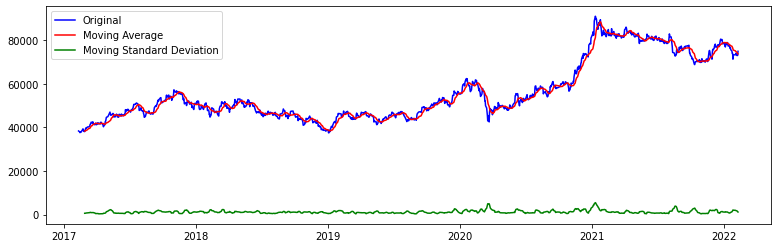

In [247]:
# 삼성전자
stationary_chart(Samsung_Electronics_ts)

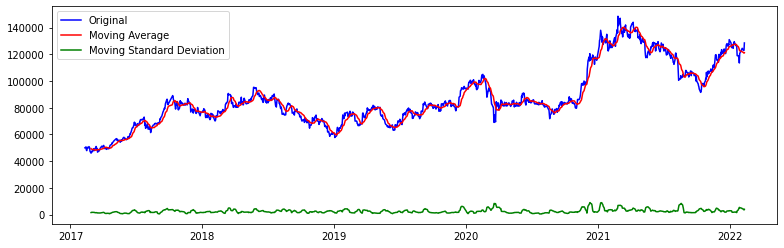

In [248]:
# SK 하이닉스
stationary_chart(Sk_Hynix_ts)

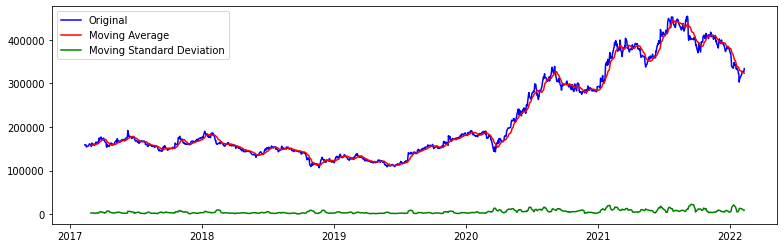

In [249]:
# 네이버
stationary_chart(Naver_ts)

* 평균이 일정하지 않은 불안정한 시계열

</br>
**시계열 정상성 통계적 지표 확인 (ADF Test)**

In [250]:
def stationary_check(timeseries):
    result = adfuller(timeseries)
    
    print('Results of Augmented Dickey-Fuller Test:')
    output = pd.Series([result[0], result[1]], index = ['ADF Statistics', 'p-value'])
    for key, value in result[4].items():
        output[f'Critical value ({key})'] = value
        
    print(output)

* 정상성 시계열 기준
1. p-value < 0.05
2. ADF Statistics < Critical value

In [251]:
stationary_check(Samsung_Electronics_ts)

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.128524
p-value                 0.703564
Critical value (1%)    -3.435704
Critical value (5%)    -2.863904
Critical value (10%)   -2.568029
dtype: float64


In [252]:
stationary_check(Sk_Hynix_ts)

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.446937
p-value                 0.559579
Critical value (1%)    -3.435708
Critical value (5%)    -2.863906
Critical value (10%)   -2.568030
dtype: float64


In [253]:
stationary_check(Naver_ts)

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -0.619181
p-value                 0.866589
Critical value (1%)    -3.435704
Critical value (5%)    -2.863904
Critical value (10%)   -2.568029
dtype: float64


* 모두 비정상성 시계열

</br>
**로그 변환**

* 비정상성 시계열 데이터를 정상성 시계열 데이터로 바꾸기 위한 로그 변환

In [254]:
# 삼성전자
Samsung_Electronics_ts_log = np.log(Samsung_Electronics_ts)
stationary_check(Samsung_Electronics_ts_log)

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.353459
p-value                 0.604374
Critical value (1%)    -3.435704
Critical value (5%)    -2.863904
Critical value (10%)   -2.568029
dtype: float64


In [255]:
# SK 하이닉스
Sk_Hynix_ts_log = np.log(Sk_Hynix_ts)
stationary_check(Sk_Hynix_ts_log)

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.800869
p-value                 0.380031
Critical value (1%)    -3.435708
Critical value (5%)    -2.863906
Critical value (10%)   -2.568030
dtype: float64


In [256]:
# 네이버
Naver_ts_log = np.log(Naver_ts)
stationary_check(Naver_ts_log)

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -0.452908
p-value                 0.900883
Critical value (1%)    -3.435708
Critical value (5%)    -2.863906
Critical value (10%)   -2.568030
dtype: float64


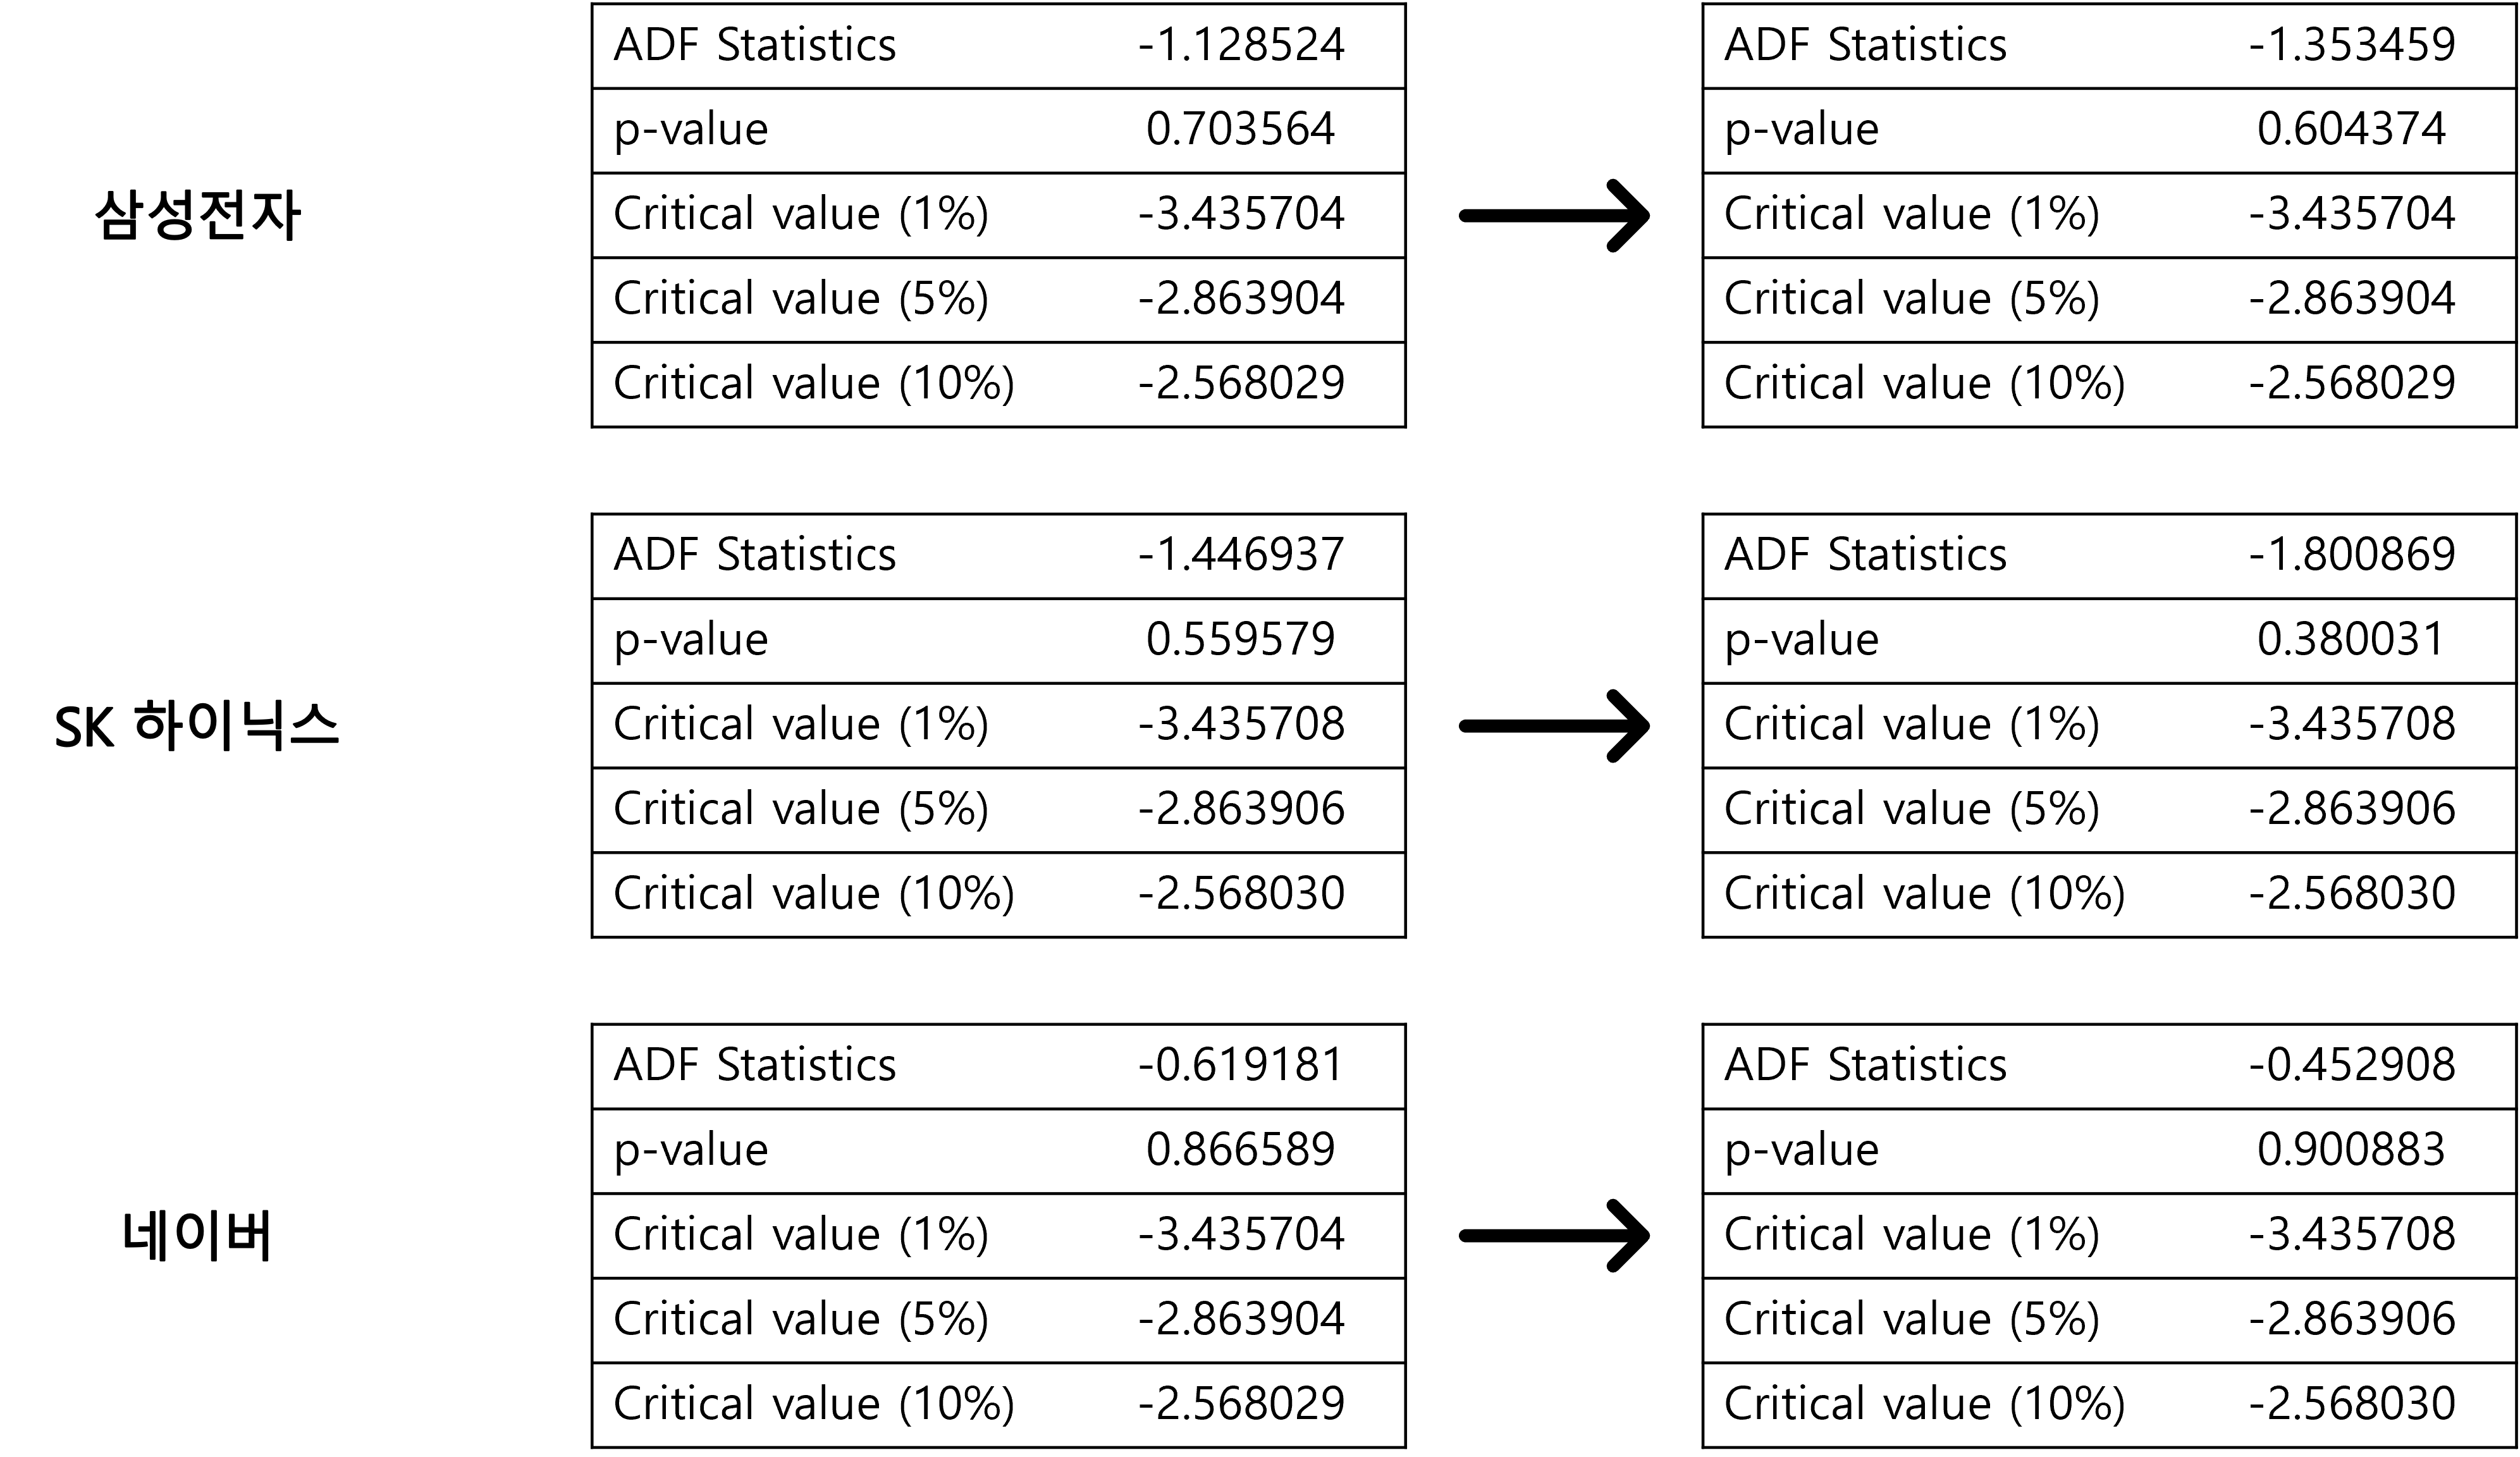

In [257]:
# 로그 변환 결과 요약
Image("log.png", width = 700)

* 삼성전자와 SK 하이닉스의 경우 로그 변환 이후로 ADF Statistics 소폭 감소, p-value 감소
* 반면 네이버의 경우 로그 변환 이후로 ADf Statistics 소폭 증가, p-value 증가

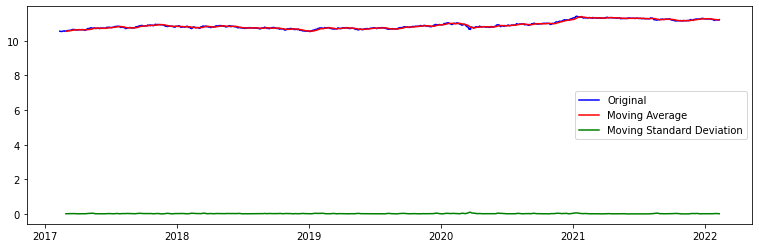

In [258]:
# 삼성전자
stationary_chart(Samsung_Electronics_ts_log)

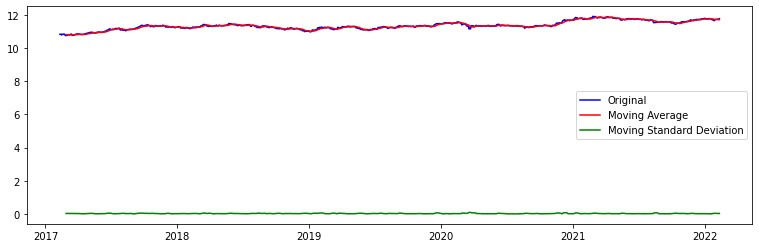

In [259]:
# SK 하이닉스
stationary_chart(Sk_Hynix_ts_log)

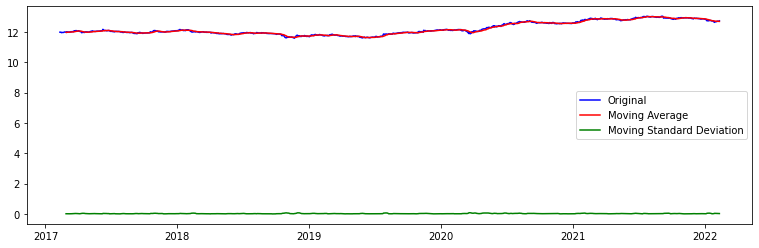

In [260]:
# 네이버
stationary_chart(Naver_ts_log)

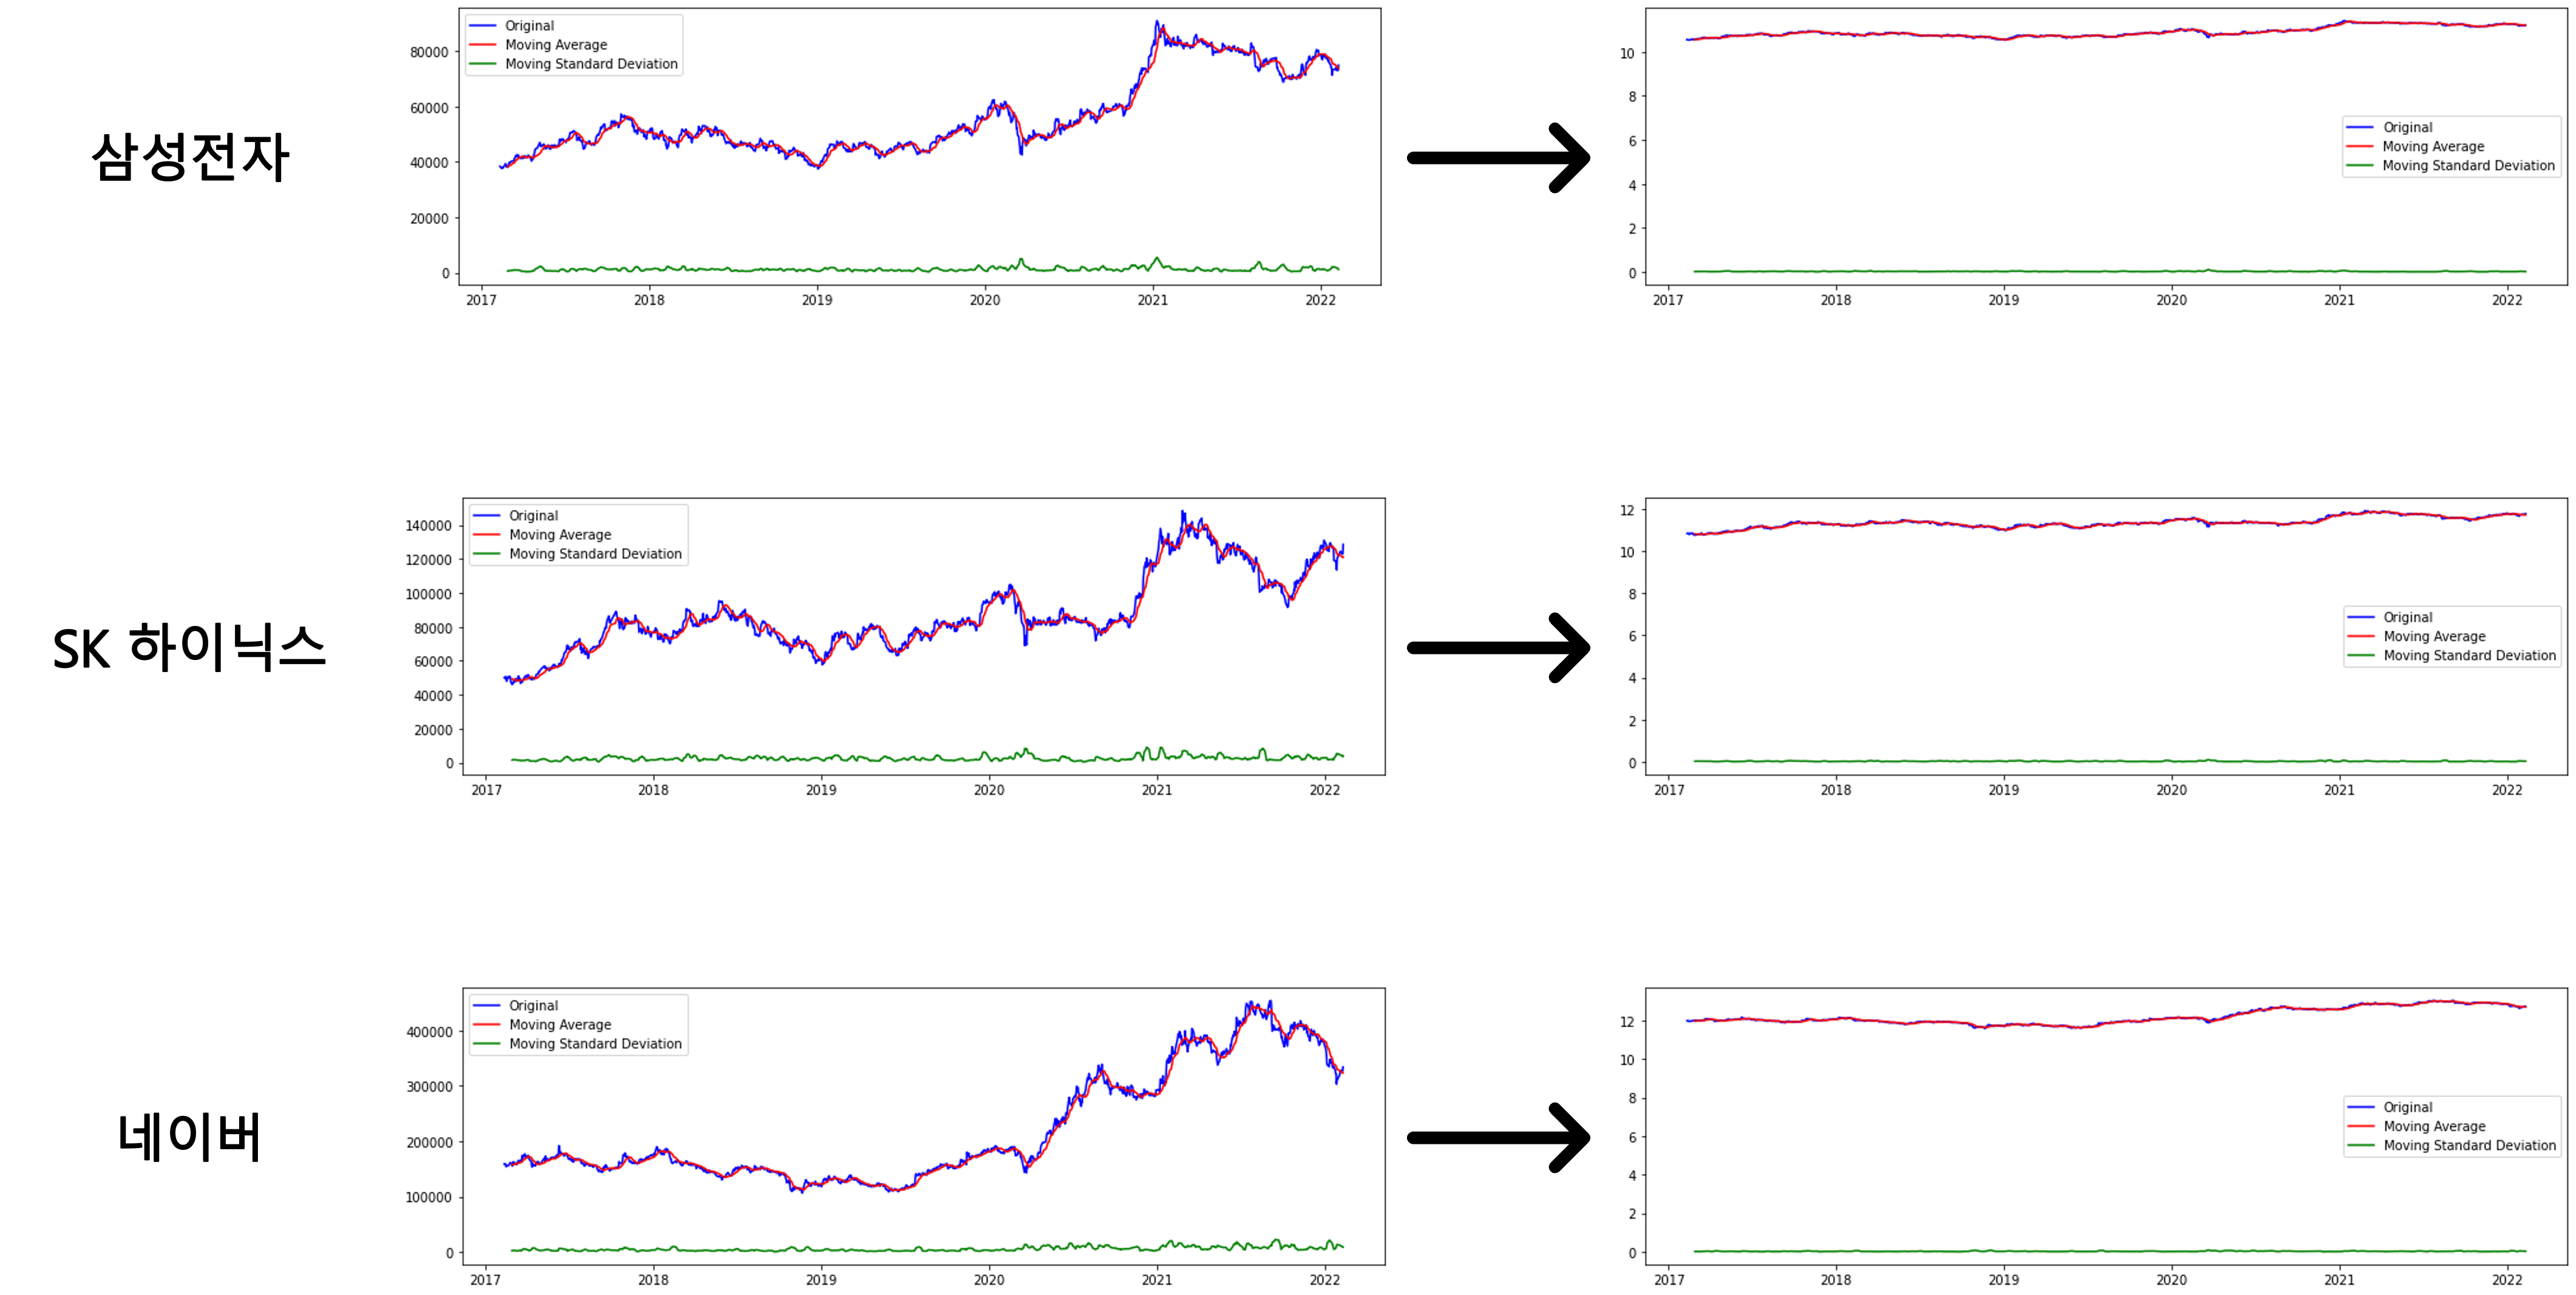

In [261]:
# 로그 변환 결과 요약
Image("log2.png")

* 로그 변환 이후로 평균이 확연히 안정됨

</br>
**시계열 분해**

* 추세, 계절성, 잔차 비교

In [262]:
def decompose_chart(timeseries):
    decomposition = seasonal_decompose(timeseries, period = 30)
    
    plt.figure(figsize = (13, 5))
    
    plt.subplot(221)
    plt.plot(timeseries, label = 'Original') # 원본
    plt.legend(loc = 'best')
    
    plt.subplot(222)
    plt.plot(decomposition.trend, label = 'Trend') # 추세
    plt.legend(loc = 'best')
    
    plt.subplot(223)
    plt.plot(decomposition.seasonal, label = 'Seasonality') # 계절성
    plt.legend(loc = 'best')
    
    plt.subplot(224)
    plt.plot(decomposition.resid, label = 'Residuals') # 잔차 (원본 - 추세 및 계절성)
    plt.legend(loc = 'best')
    
    plt.tight_layout()

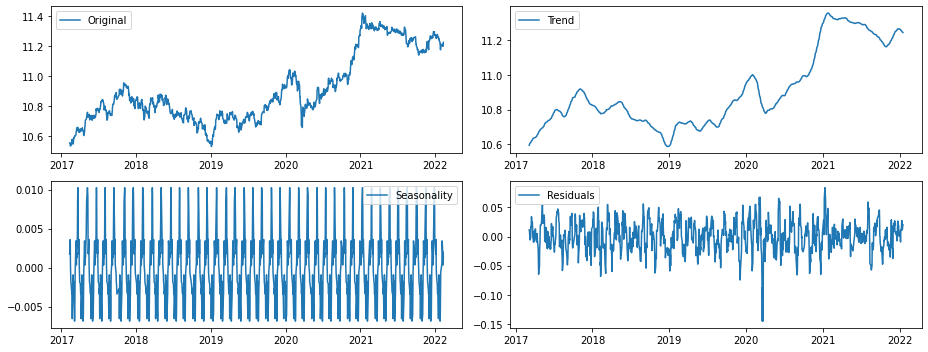

In [263]:
# 삼성전자
decompose_chart(Samsung_Electronics_ts_log)

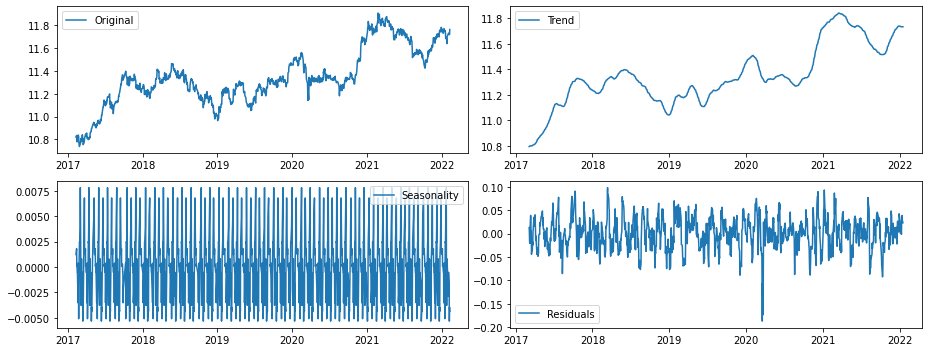

In [264]:
# SK 하이닉스
decompose_chart(Sk_Hynix_ts_log)

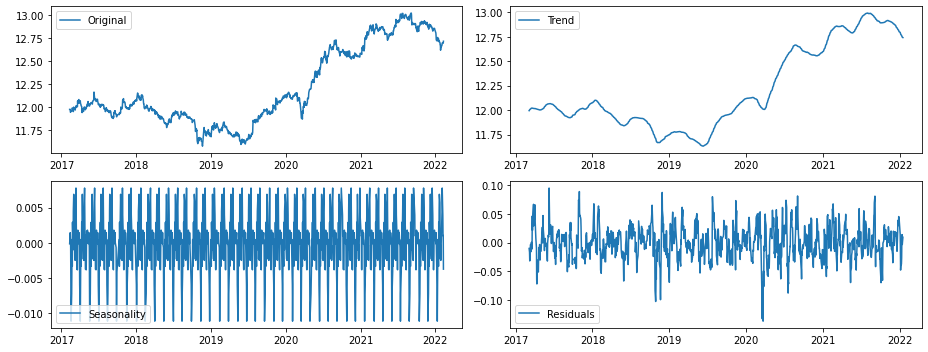

In [265]:
# 네이버
decompose_chart(Naver_ts_log)

</br>
**잔차 정상성 확인**

* 시계열 분해를 통해 얻은 잔차의 정상성 확인

In [266]:
# 삼성전자 잔차 저장
decomposition = seasonal_decompose(Samsung_Electronics_ts_log, period = 30)
Samsung_Electronics_residuals = decomposition.resid
Samsung_Electronics_residuals.dropna(inplace = True)

# SK 하이닉스 잔차 저장
decomposition = seasonal_decompose(Sk_Hynix_ts_log, period = 30)
Sk_Hynix_residuals = decomposition.resid
Sk_Hynix_residuals.dropna(inplace = True)

# 네이버 잔차 저장
decomposition = seasonal_decompose(Naver_ts_log, period = 30)
Naver_residuals = decomposition.resid
Naver_residuals.dropna(inplace = True)

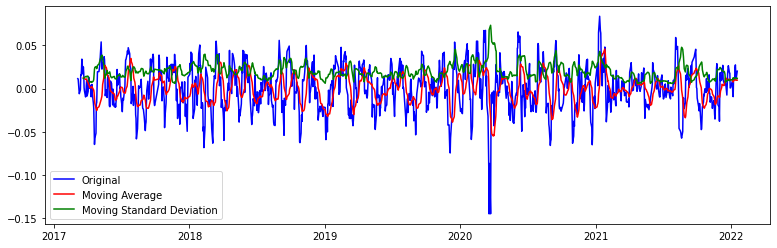

In [267]:
# 삼성전자 잔차 그래프
stationary_chart(Samsung_Electronics_residuals)

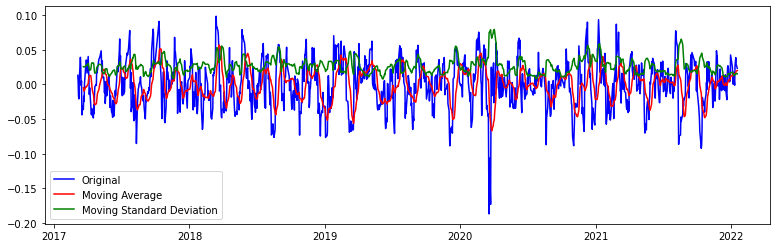

In [268]:
# SK 하이닉스 잔차 그래프
stationary_chart(Sk_Hynix_residuals)

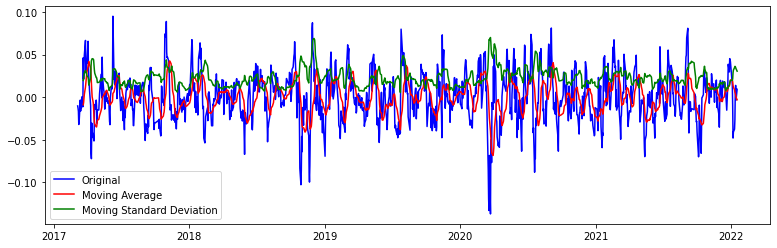

In [269]:
# 네이버 잔차 그래프
stationary_chart(Naver_residuals)

In [270]:
# 삼성전자 잔차 ADF Test
stationary_check(Samsung_Electronics_residuals)

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.013341e+01
p-value                 8.796220e-18
Critical value (1%)    -3.435928e+00
Critical value (5%)    -2.864003e+00
Critical value (10%)   -2.568081e+00
dtype: float64


In [271]:
# SK 하이닉스 잔차 ADF Test
stationary_check(Sk_Hynix_residuals)

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.065066e+01
p-value                 4.670388e-19
Critical value (1%)    -3.435942e+00
Critical value (5%)    -2.864009e+00
Critical value (10%)   -2.568085e+00
dtype: float64


In [272]:
# 네이버 잔차 ADF Test
stationary_check(Naver_residuals)

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -9.900485e+00
p-value                 3.368169e-17
Critical value (1%)    -3.435923e+00
Critical value (5%)    -2.864001e+00
Critical value (10%)   -2.568080e+00
dtype: float64


* 모두 정상성을 만족


* 정상성 시계열 기준
1. p-value < 0.05
2. ADF Statistics < Critical value

</br>
**모델 개요**

* 현재 시계열 데이터가 비정상성을 띄므로, 데이터를 변형하거나 ARIMA 모델을 사용하여 분석할 수 있음
* 원본 데이터와 ARIMA 모델을 사용하기로 결정함

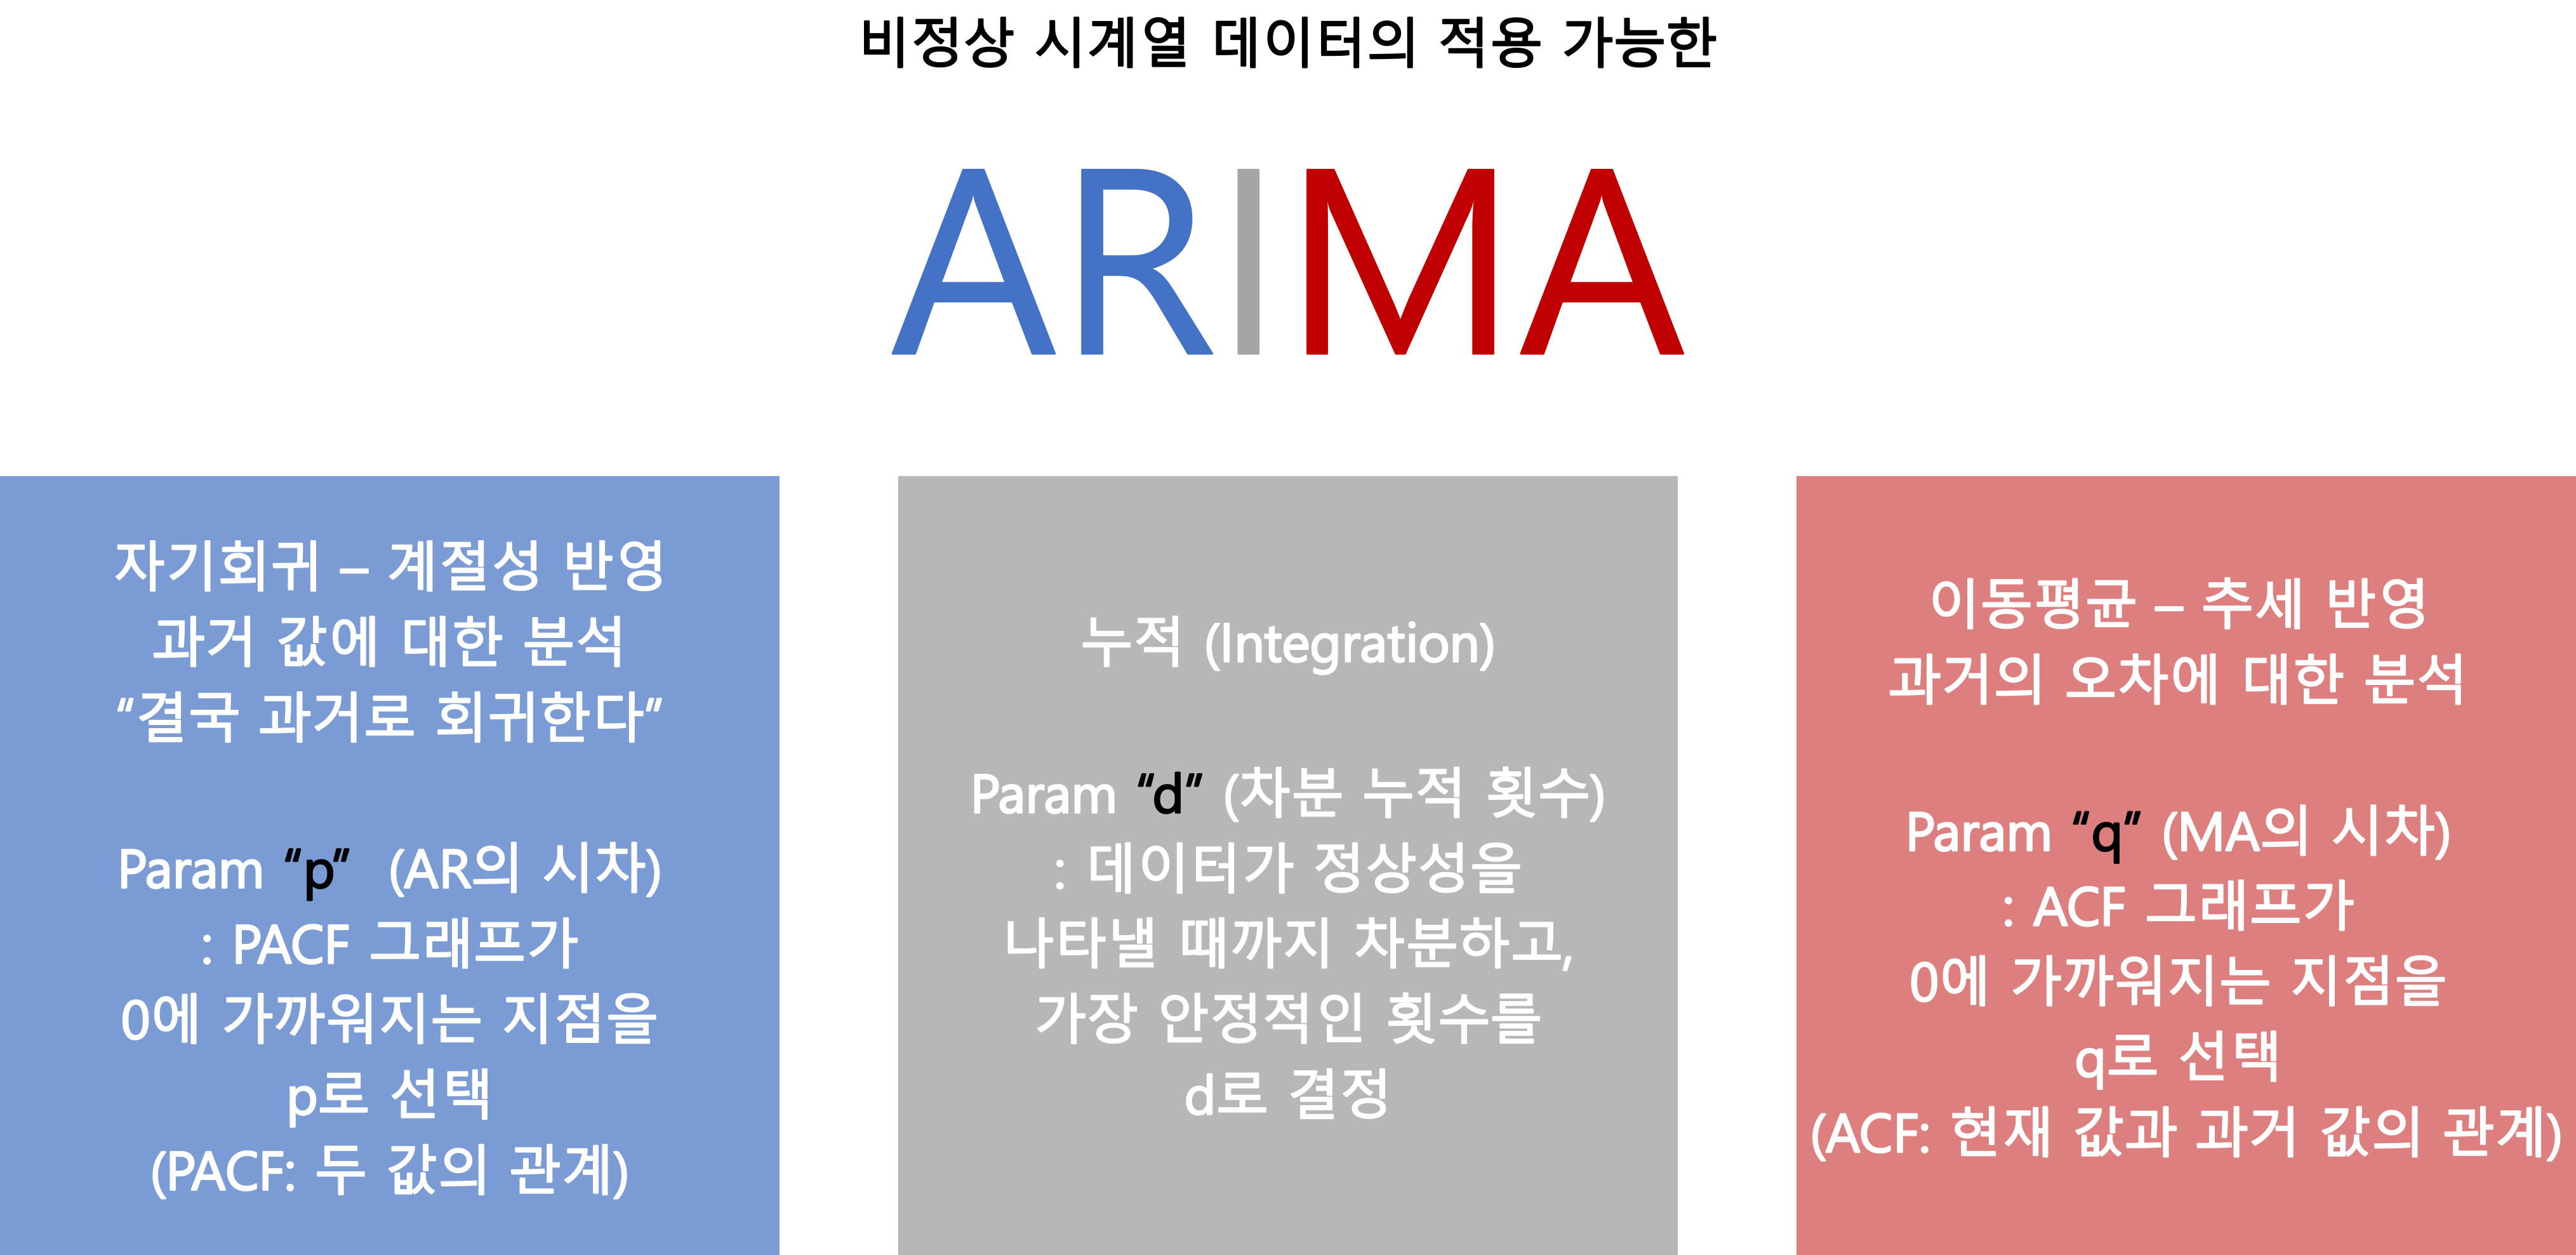

In [273]:
# ARIMA 모델 개요
Image("arima.png", width = 700)

</br>
**ARIMA의 파라미터 d 설정**

* 차분 횟수에 따른 변화 확인

In [274]:
def diff_chart(timeseries):
    diff = timeseries
    for n in range(5):
        plt.figure(figsize = (6, 2))
        diff = diff.diff(periods = 1).iloc[1:] # 차분
        diff.plot(title = f'Difference {n+1}') # 분포
        plt.show()
        stationary_check(diff) # ADF Test

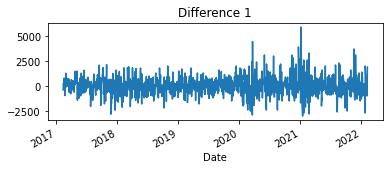

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -33.753184
p-value                  0.000000
Critical value (1%)     -3.435708
Critical value (5%)     -2.863906
Critical value (10%)    -2.568030
dtype: float64


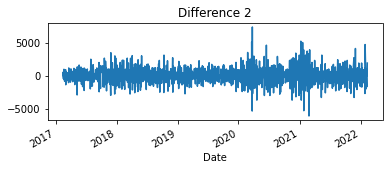

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.303221e+01
p-value                 2.332304e-24
Critical value (1%)    -3.435802e+00
Critical value (5%)    -2.863948e+00
Critical value (10%)   -2.568052e+00
dtype: float64


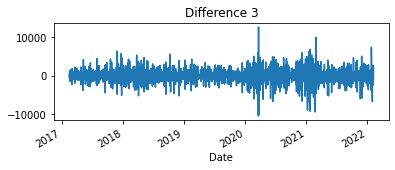

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.697485e+01
p-value                 9.102210e-30
Critical value (1%)    -3.435820e+00
Critical value (5%)    -2.863956e+00
Critical value (10%)   -2.568056e+00
dtype: float64


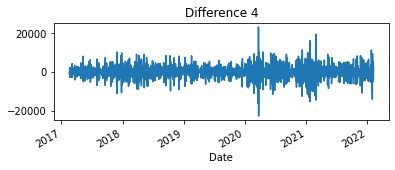

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -19.204046
p-value                  0.000000
Critical value (1%)     -3.435825
Critical value (5%)     -2.863958
Critical value (10%)    -2.568057
dtype: float64


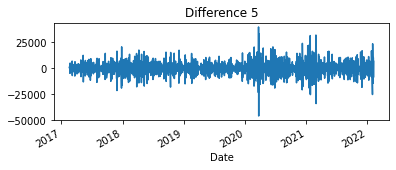

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -20.220352
p-value                  0.000000
Critical value (1%)     -3.435829
Critical value (5%)     -2.863960
Critical value (10%)    -2.568058
dtype: float64


In [275]:
# 삼성전자
diff_chart(Samsung_Electronics_ts)

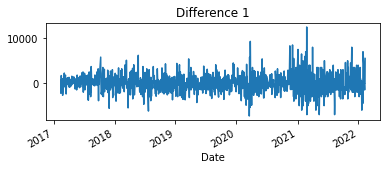

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -36.967748
p-value                  0.000000
Critical value (1%)     -3.435708
Critical value (5%)     -2.863906
Critical value (10%)    -2.568030
dtype: float64


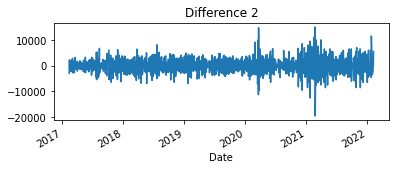

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.322007e+01
p-value                 1.005931e-24
Critical value (1%)    -3.435802e+00
Critical value (5%)    -2.863948e+00
Critical value (10%)   -2.568052e+00
dtype: float64


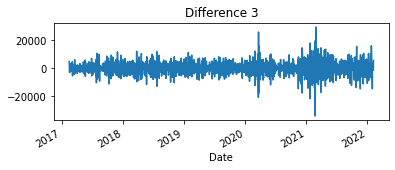

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.677123e+01
p-value                 1.286433e-29
Critical value (1%)    -3.435816e+00
Critical value (5%)    -2.863954e+00
Critical value (10%)   -2.568055e+00
dtype: float64


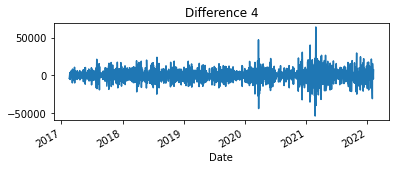

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -19.250065
p-value                  0.000000
Critical value (1%)     -3.435825
Critical value (5%)     -2.863958
Critical value (10%)    -2.568057
dtype: float64


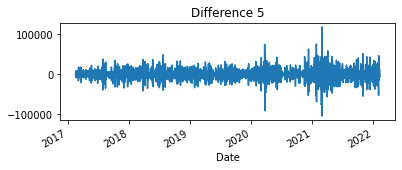

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -20.680482
p-value                  0.000000
Critical value (1%)     -3.435829
Critical value (5%)     -2.863960
Critical value (10%)    -2.568058
dtype: float64


In [276]:
# SK 하이닉스
diff_chart(Sk_Hynix_ts)

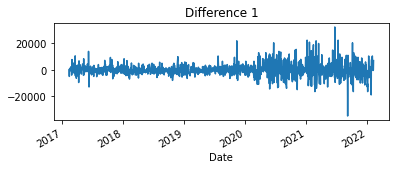

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -26.161292
p-value                  0.000000
Critical value (1%)     -3.435713
Critical value (5%)     -2.863908
Critical value (10%)    -2.568031
dtype: float64


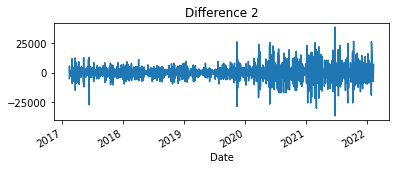

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.354226e+01
p-value                 2.500099e-25
Critical value (1%)    -3.435802e+00
Critical value (5%)    -2.863948e+00
Critical value (10%)   -2.568052e+00
dtype: float64


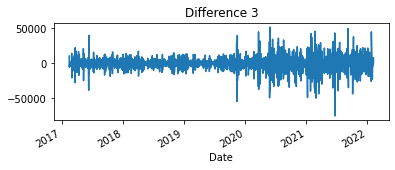

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -1.699414e+01
p-value                 8.824933e-30
Critical value (1%)    -3.435820e+00
Critical value (5%)    -2.863956e+00
Critical value (10%)   -2.568056e+00
dtype: float64


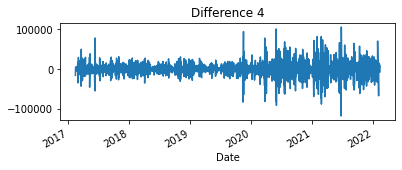

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -20.242388
p-value                  0.000000
Critical value (1%)     -3.435825
Critical value (5%)     -2.863958
Critical value (10%)    -2.568057
dtype: float64


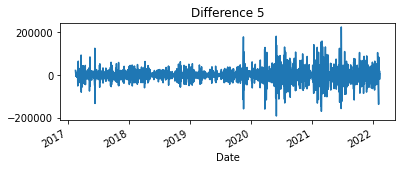

Results of Augmented Dickey-Fuller Test:
ADF Statistics         -21.781580
p-value                  0.000000
Critical value (1%)     -3.435829
Critical value (5%)     -2.863960
Critical value (10%)    -2.568058
dtype: float64


In [277]:
# 네이버
diff_chart(Naver_ts)

* d(차분 횟수)를 2로 결정, p/q를 결정을 위해 PACF/ACF을 그릴 때 반영

In [278]:
# 삼성전자 d 반영
Samsung_Electronics_diff = Samsung_Electronics_ts.diff(periods = 1).iloc[1:] # 차분 1회
Samsung_Electronics_diff = Samsung_Electronics_diff.diff(periods = 1).iloc[1:] # 차분 2회

# SK 하이닉스 d 반영
Sk_Hynix_diff = Sk_Hynix_ts.diff(periods = 1).iloc[1:] # 차분 1회
Sk_Hynix_diff = Sk_Hynix_diff.diff(periods = 1).iloc[1:] # 차분 2회

# 네이버 d 반영
Naver_diff = Naver_ts.diff(periods = 1).iloc[1:] # 차분 1회
Naver_diff = Naver_diff.diff(periods = 1).iloc[1:] # 차분 2회

</br>
**ARIMA의 파라미터 p, q 설정**

* ACF가 0에 가까워지는 지점을 p로, PACF가 0에 가까워지는 지점을 q로 결정하고자 함
* 일반적으로 p + q < 2, p * q = 0인 값을 사용

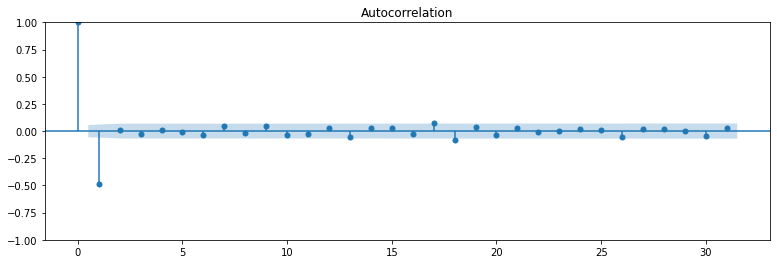

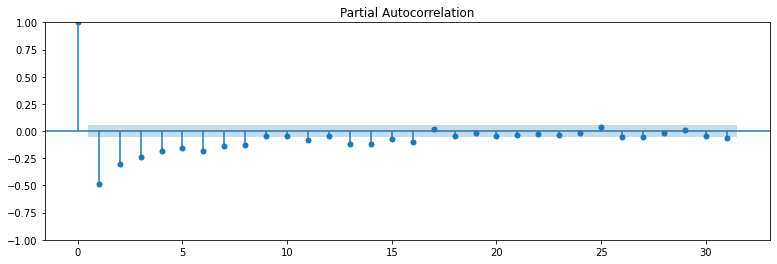

In [279]:
# 삼성전자
plot_acf(Samsung_Electronics_diff) # ACF 플로팅
plot_pacf(Samsung_Electronics_diff) # PACF 플로팅
plt.show()

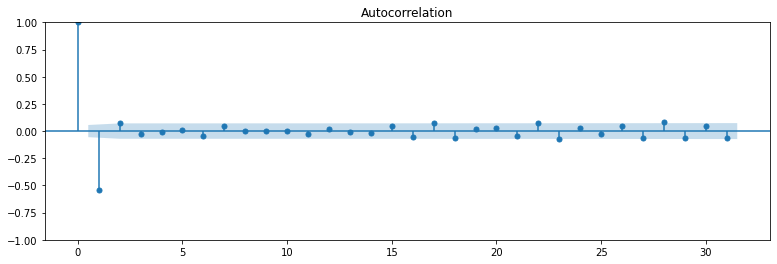

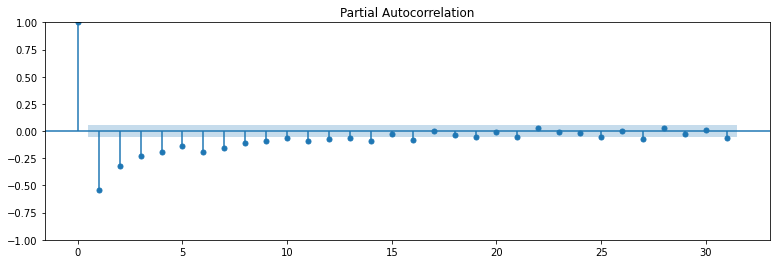

In [280]:
# SK 하이닉스
plot_acf(Sk_Hynix_diff) # ACF 플로팅
plot_pacf(Sk_Hynix_diff) # PACF 플로팅
plt.show()

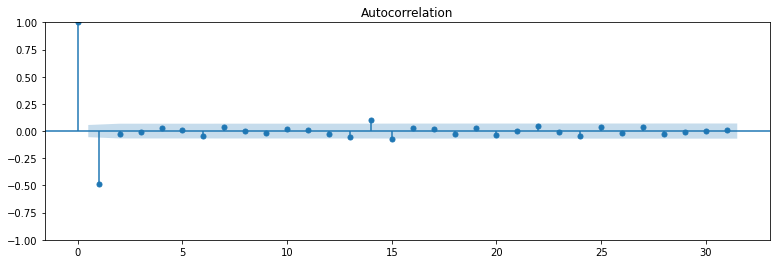

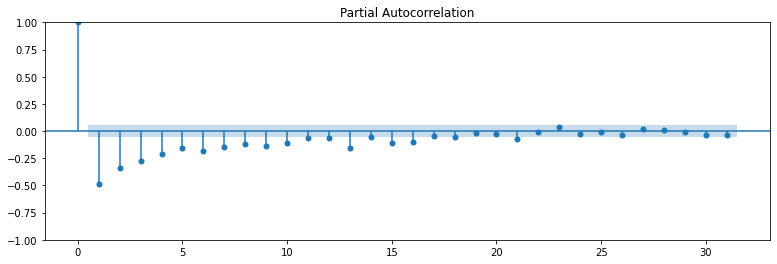

In [281]:
# 네이버
plot_acf(Naver_diff) # ACF 플로팅
plot_pacf(Naver_diff) # PACF 플로팅
plt.show()

* ACF가 0에 급격히 가까워 지는 지점, q는 3으로 결정
* PACF가 1 이후로 점점 0에 가까운 양상이 보이고, 16 이후로 완전히 0에 근접함, p는 17로 결정 

</br>
**모델링**

* 훈련/시험 데이터 분리

In [282]:
def train_test_split(timeseries):
    division = int(len(timeseries) * 0.9) # 훈련, 시험 데이터 비중이 9대1
    train_data, test_data = timeseries[:division], timeseries[division:] # 데이터 분리
    
    # 시각화
    plt.grid(True)
    plt.plot(timeseries, c = 'b', label = 'Training Dataset')
    plt.plot(test_data, c = 'r', label = 'Test Dataset')
    plt.plot(title = 'Datasets')
    plt.legend()
    
    return train_data, test_data

* 모델 훈련 및 예측

In [332]:
def train(train_data, test_data):
    model = ARIMA(train_data, order = (17, 2, 3)) # 모델 선언
    model_fit = model.fit() # 모델 피팅
    print(model_fit.summary()) # 모델 정보
    
    pred = model_fit.forecast(len(test_data)) # 모델 예측
    pred = np.array(pred) # 형식 변환
    
    return pred

In [333]:
# 시각화
def prediction_chart(train_data, test_data, pred):
    pred = pd.Series(pred, index = test_data.index)
    plt.plot(train_data, c = 'b')
    plt.plot(test_data, c = 'g', label = 'actual price')
    plt.plot(pred, c = 'r', label = 'predicted price')
    plt.legend()
    plt.show()

* 결과 평가 지표

In [334]:
def score(target, pred):
    mse = mean_squared_error(target, pred)
    mae = mean_absolute_error(target, pred)
    rmse = mse ** (0.5)
    mape = np.mean(np.abs((pred - target) / target))
    
    score = pd.Series([mse, mae, rmse, '{:.2f}%'.format(mape * 100)], index = ['MSE', 'MAE', 'RMSE', 'MAPE'])
    
    print(score)

</br>
**훈련/시험 데이터 분리**

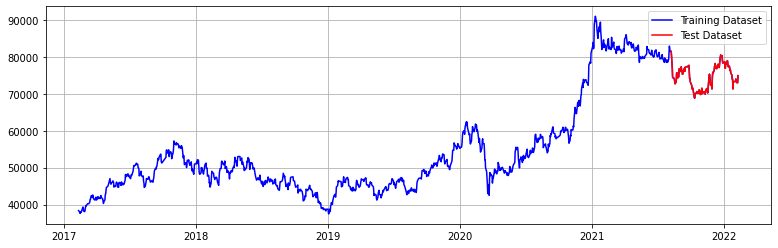

In [335]:
# 삼성전자
Samsung_Electronics_train, Samsung_Electronics_test = train_test_split(Samsung_Electronics_ts)

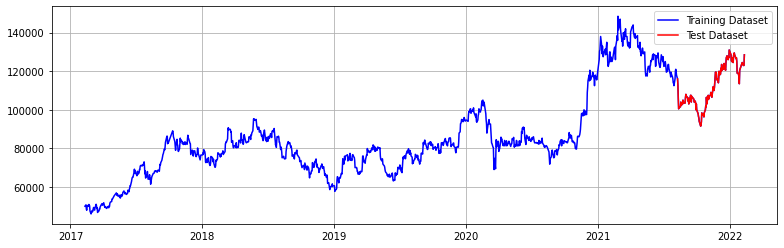

In [336]:
# SK 하이닉스
Sk_Hynix_train, Sk_Hynix_test = train_test_split(Sk_Hynix_ts)

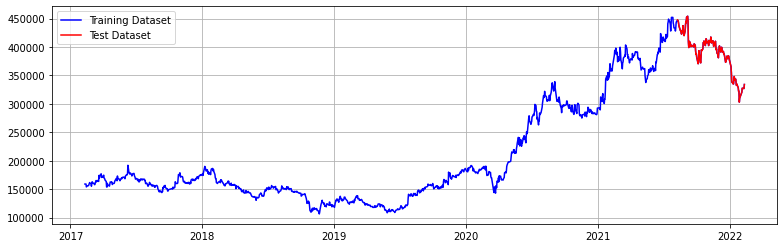

In [337]:
# 네이버
Naver_train, Naver_test = train_test_split(Naver_ts)

</br>
**모델 훈련 및 예측**

In [338]:
# 삼성전자
Samsung_Electronics_pred = train(Samsung_Electronics_train, Samsung_Electronics_test)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1102
Model:                ARIMA(17, 2, 3)   Log Likelihood               -9112.518
Date:                Fri, 11 Feb 2022   AIC                          18267.037
Time:                        13:22:43   BIC                          18372.101
Sample:                             0   HQIC                         18306.783
                               - 1102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2211      0.317     -0.699      0.485      -0.842       0.399
ar.L2         -0.3086      0.264     -1.170      0.242      -0.826       0.208
ar.L3          0.0364      0.051      0.714      0.4

In [339]:
# SK 하이닉스
Sk_Hynix_pred = train(Sk_Hynix_train, Sk_Hynix_test)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1102
Model:                ARIMA(17, 2, 3)   Log Likelihood              -10003.581
Date:                Fri, 11 Feb 2022   AIC                          20049.163
Time:                        13:23:10   BIC                          20154.227
Sample:                             0   HQIC                         20088.909
                               - 1102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2869      0.059    -21.944      0.000      -1.402      -1.172
ar.L2         -0.8300      0.061    -13.646      0.000      -0.949      -0.711
ar.L3          0.0476      0.044      1.090      0.2

In [340]:
# 네이버
Naver_pred = train(Naver_train, Naver_test)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1102
Model:                ARIMA(17, 2, 3)   Log Likelihood              -10981.580
Date:                Fri, 11 Feb 2022   AIC                          22005.160
Time:                        13:23:39   BIC                          22110.224
Sample:                             0   HQIC                         22044.906
                               - 1102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5673      0.103     -5.515      0.000      -0.769      -0.366
ar.L2         -0.7005      0.106     -6.610      0.000      -0.908      -0.493
ar.L3          0.0425      0.033      1.278      0.2

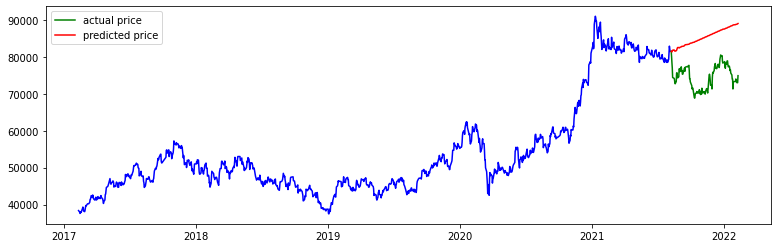

In [341]:
# 삼성전자 예측 시각화
prediction_chart(Samsung_Electronics_train, Samsung_Electronics_test, Samsung_Electronics_pred)

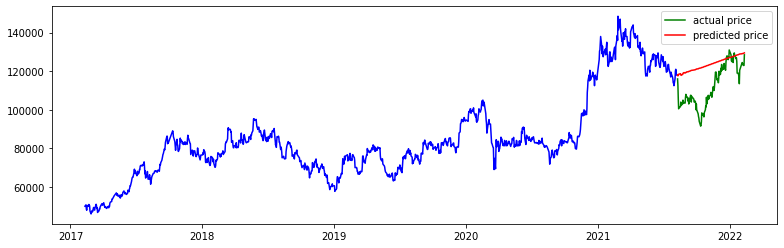

In [342]:
# SK 하이닉스 예측 시각화
prediction_chart(Sk_Hynix_train, Sk_Hynix_test, Sk_Hynix_pred)

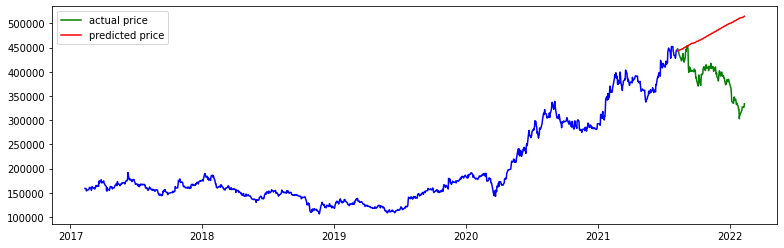

In [343]:
# 네이버 예측 시각화
prediction_chart(Naver_train, Naver_test, Naver_pred)

</br>
**결과 평가 지표**

In [344]:
# 삼성전자
score(Samsung_Electronics_test, Samsung_Electronics_pred)

MSE     125544141.945389
MAE          10618.06789
RMSE        11204.648229
MAPE              14.41%
dtype: object


In [345]:
# SK 하이닉스
score(Sk_Hynix_test, Sk_Hynix_pred)

MSE     196847819.854384
MAE         11672.737592
RMSE        14030.246607
MAPE              11.14%
dtype: object


In [346]:
# 네이버
score(Naver_test, Naver_pred)

MSE     10587201141.142096
MAE           87905.098313
RMSE         102894.125883
MAPE                23.96%
dtype: object


### 개선방안

* 차분을 하지 않고, 모델의 trend를 제어하는 방법

</br>
**ARIMA의 파라미터 p, q 설정**

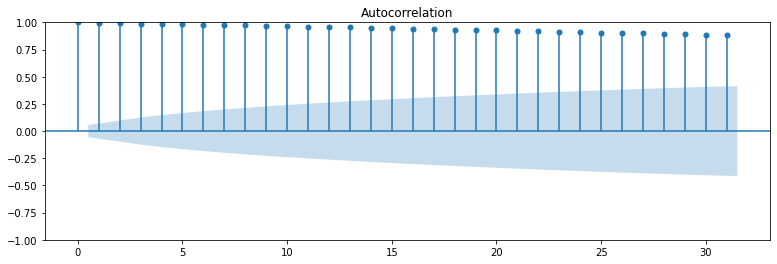

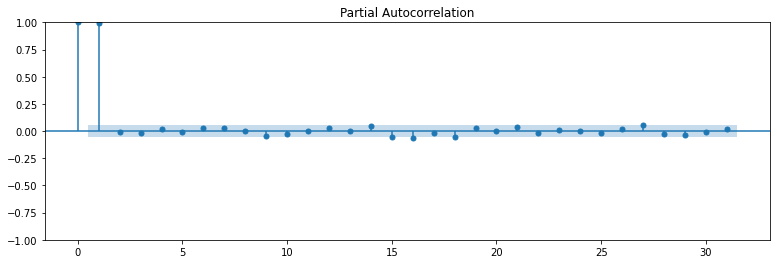

In [347]:
# 삼성전자
plot_acf(Samsung_Electronics_ts) # ACF 플로팅
plot_pacf(Samsung_Electronics_ts) # PACF 플로팅
plt.show()

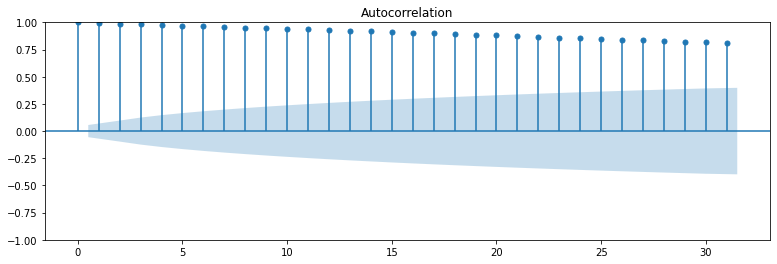

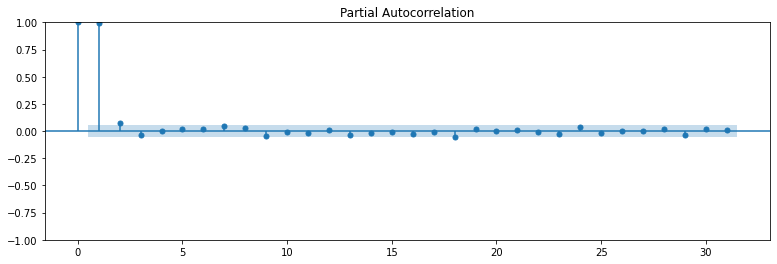

In [348]:
# SK 하이닉스
plot_acf(Sk_Hynix_ts) # ACF 플로팅
plot_pacf(Sk_Hynix_ts) # PACF 플로팅
plt.show()

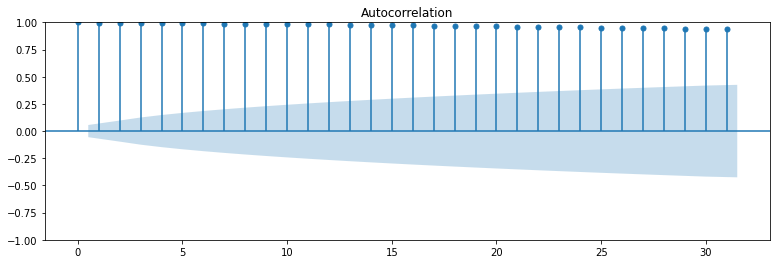

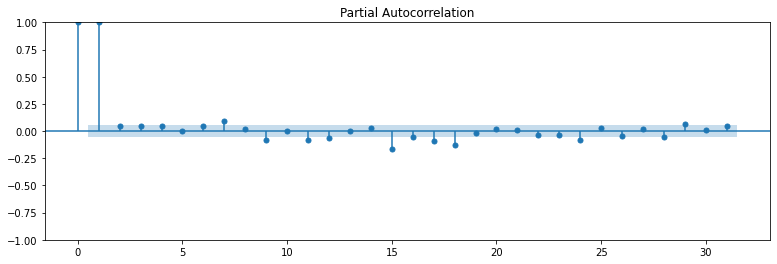

In [349]:
# 네이버
plot_acf(Naver_ts) # ACF 플로팅
plot_pacf(Naver_ts) # PACF 플로팅
plt.show()

* PACF가 급격히 0에 가까워지는 지점, p는 2로 결정
* ACF는 0에 가까워지지 않는 양상, q는 가장 큰 지점인 30으로 하되 다양한 시도가 필요함

</br>
**모델링**

* 모델 훈련 및 예측

In [350]:
def train2(train_data, test_data):
    model = ARIMA(train_data, order = (2, 0, 30), trend = 'ct') # 모델 선언
    model_fit = model.fit() # 모델 피팅
    print(model_fit.summary()) # 모델 정보
    
    pred = model_fit.forecast(len(test_data)) # 모델 예측
    pred = np.array(pred) # 형식 변환
    
    return pred

In [351]:
# 삼성전자
Samsung_Electronics_pred2 = train2(Samsung_Electronics_train, Samsung_Electronics_test)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1102
Model:                ARIMA(2, 0, 30)   Log Likelihood               -9046.329
Date:                Fri, 11 Feb 2022   AIC                          18162.657
Time:                        13:25:03   BIC                          18337.828
Sample:                             0   HQIC                         18228.920
                               - 1102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.77e+04   1.56e+04      2.409      0.016    7028.527    6.84e+04
x1            34.3782     18.616      1.847      0.065      -2.108      70.864
ar.L1          0.2326      0.383      0.607      0.5

In [352]:
# SK 하이닉스
Sk_Hynix_pred2 = train2(Sk_Hynix_train, Sk_Hynix_test)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1102
Model:                ARIMA(2, 0, 30)   Log Likelihood               -9942.692
Date:                Fri, 11 Feb 2022   AIC                          19955.385
Time:                        13:25:40   BIC                          20130.556
Sample:                             0   HQIC                         20021.647
                               - 1102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.653e+04   1.52e+04      3.721      0.000    2.68e+04    8.63e+04
x1            51.0170     19.010      2.684      0.007      13.758      88.276
ar.L1          1.1138      2.040      0.546      0.5

In [353]:
# 네이버
Naver_pred2 = train2(Naver_train, Naver_test)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1102
Model:                ARIMA(2, 0, 30)   Log Likelihood              -10840.323
Date:                Fri, 11 Feb 2022   AIC                          21750.645
Time:                        13:27:21   BIC                          21925.816
Sample:                             0   HQIC                         21816.908
                               - 1102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.93e+04      0.055   1.62e+06      0.000    8.93e+04    8.93e+04
x1           206.2532     57.576      3.582      0.000      93.406     319.100
ar.L1          1.8361      0.082     22.526      0.0

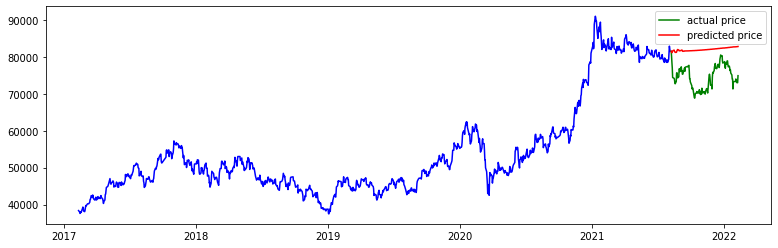

In [354]:
# 삼성전자 예측 시각화
prediction_chart(Samsung_Electronics_train, Samsung_Electronics_test, Samsung_Electronics_pred2)

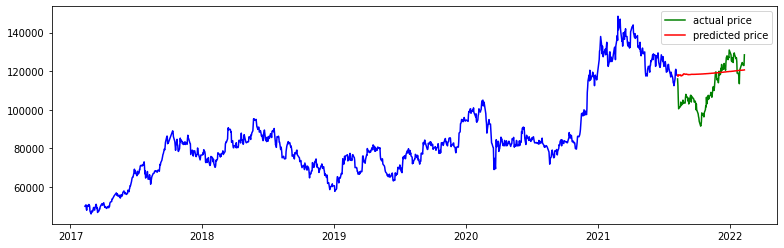

In [355]:
# SK 하이닉스 예측 시각화
prediction_chart(Sk_Hynix_train, Sk_Hynix_test, Sk_Hynix_pred2)

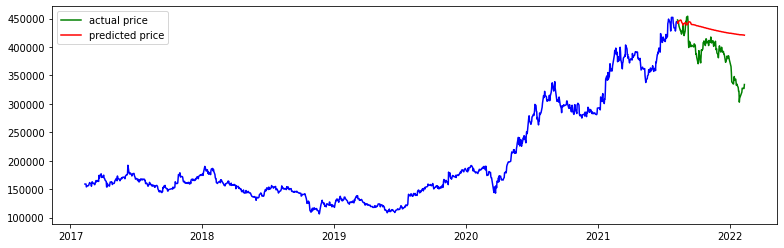

In [356]:
# 네이버 예측 시각화
prediction_chart(Naver_train, Naver_test, Naver_pred2)

</br>
**결과 평가 지표**

In [357]:
# 삼성전자
score(Samsung_Electronics_test, Samsung_Electronics_pred2)

MSE     63620498.518426
MAE         7355.266393
RMSE        7976.245891
MAPE             10.05%
dtype: object


In [358]:
# SK 하이닉스
score(Sk_Hynix_test, Sk_Hynix_pred2)

MSE     146014415.286496
MAE         10105.666036
RMSE        12083.642468
MAPE               9.58%
dtype: object


In [359]:
# 네이버
score(Naver_test, Naver_pred2)

MSE     2534137290.693056
MAE          42010.808703
RMSE         50340.215441
MAPE               11.51%
dtype: object


### 프로젝트 평가 및 한계

</br>
**개선방안**

* statsmodels의 ARIMA 모델은 trend를 제어하는 변수가 있으나, 차분과 함께 적용이 불가합니다.
* 이는 같은 기능이 중복되기 때문이며, 0 이상의 d 파라미터와 trend를 함께 설정할 경우 아래 이미지와 같은 에러가 발생합니다.

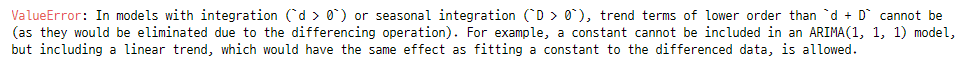

In [367]:
# 예시: model = ARIMA(train_data, order = (17, 2, 3), trend = 'ct')
Image("diff.PNG")

```
 # 기존
 model = ARIMA(train_data, order = (17, 2, 3))
 
 # 변경
 model = ARIMA(train_data, order = (2, 0, 30), trend = 'ct') # d = 0, trend = 'ct'
```

* statsmodels의 ARIMA에서 trend는 추세를 컨트롤하는 파라미터입니다.
* c는 constant 요소를, t는 시간에 따른 선형적 요소를 가리킵니다.
* 'ct'를 사용함으로써 상수항과 시간에 따른 선형적 요소를 고려하도록 지정하였습니다.

* 개선 전과 후의 예측 결과를 그래프로 보면 다음과 같습니다.

In [361]:
# 예측 결과 시각화
def prediction_chart_detail(target, pred, pred2):
    pred = pd.Series(pred, index = target.index)
    pred2 = pd.Series(pred2, index = target.index)
    plt.plot(target, c = 'g', label = 'actual price') # green 실제 가격
    plt.plot(pred, c = 'r', label = 'predicted price') # red 기존 예측
    plt.plot(pred2, c = 'b', label = 'advanced predicted price') # blue 예측 개선
    plt.legend()
    plt.show()

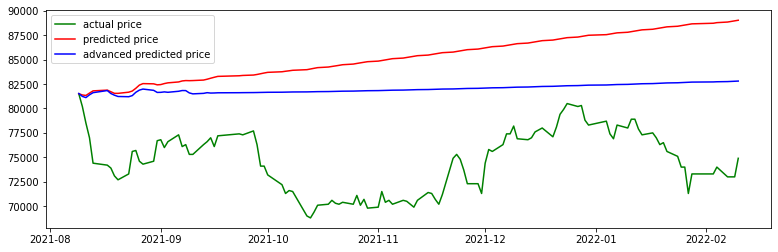

In [362]:
# 삼성전자
prediction_chart_detail(Samsung_Electronics_test, Samsung_Electronics_pred, Samsung_Electronics_pred2)

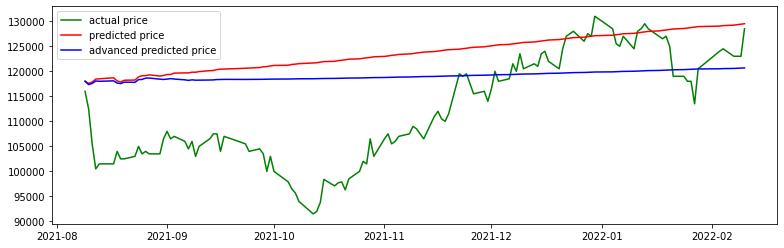

In [363]:
# SK 하이닉스
prediction_chart_detail(Sk_Hynix_test, Sk_Hynix_pred, Sk_Hynix_pred2)

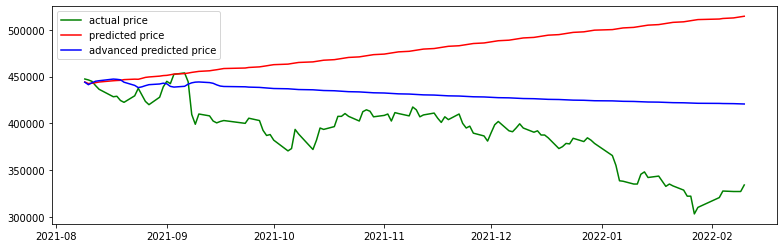

In [364]:
# 네이버
prediction_chart_detail(Naver_test, Naver_pred, Naver_pred2)

* 개전 전과 후의 예측 결과를 수치적으로 보면 다음과 같습니다.

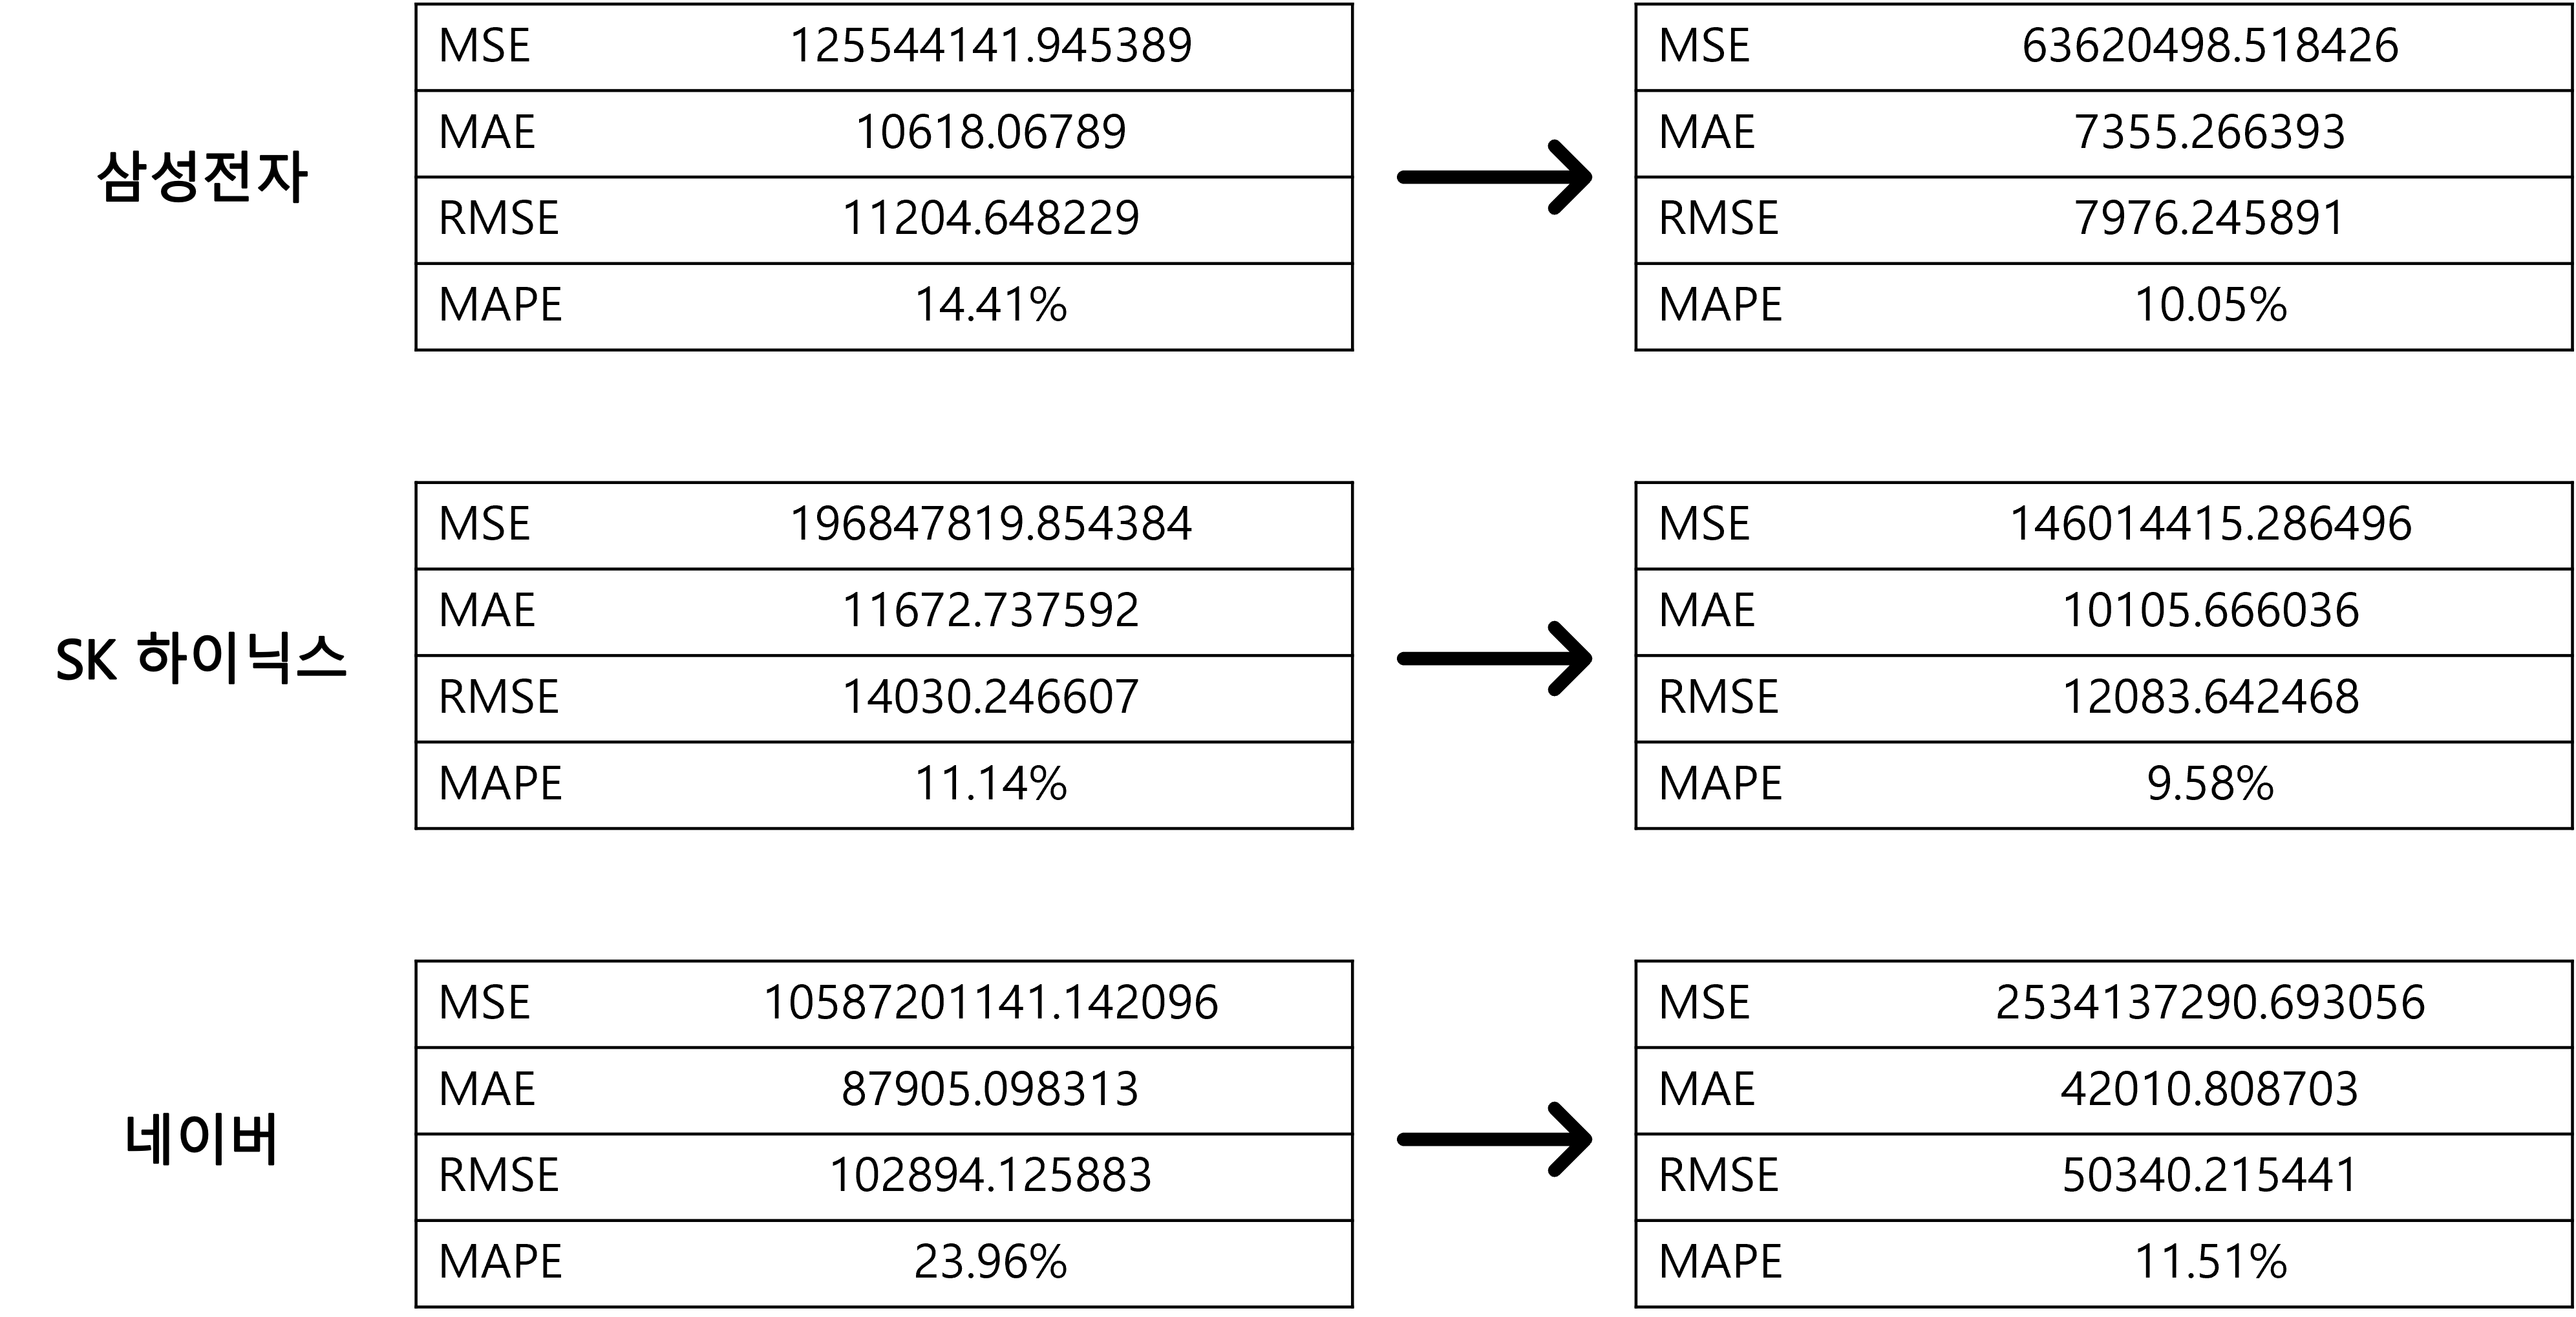

In [365]:
# score(target, pred) 비교
Image("result.png", width = 700)

</br>
**한계**

* 아쉬운 점은 예측 결과의 선이 직선 형태라는 점입니다.
* 직선 형태의 결과가 나온 이유는 예측을 할 때 사용되는 데이터가 모두 같기 때문입니다.
* 즉, 21년의 8월부터 22년의 2월까지 모두 같은 관측치를 바탕으로 예측합니다.
* 이를 개선하기 위한 좋은 방법은 하루하루 관측치를 업데이트하는 것입니다.
* "내일의 주가"를 예측하는데 "오늘의 주가"를 추가하여 매일매일 반복하면 더욱 좋은 모델이 될 것입니다.

[시계열 분석 시리즈 (4): Python auto_arima로 삼성 주가 제대로 예측하기, Be Geeky](https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/)

</br>
**로그 변환**

* 의문스러운 점은 로그 변환이 시계열 정상성에 악영향을 미칠 수 있다는 점입니다.

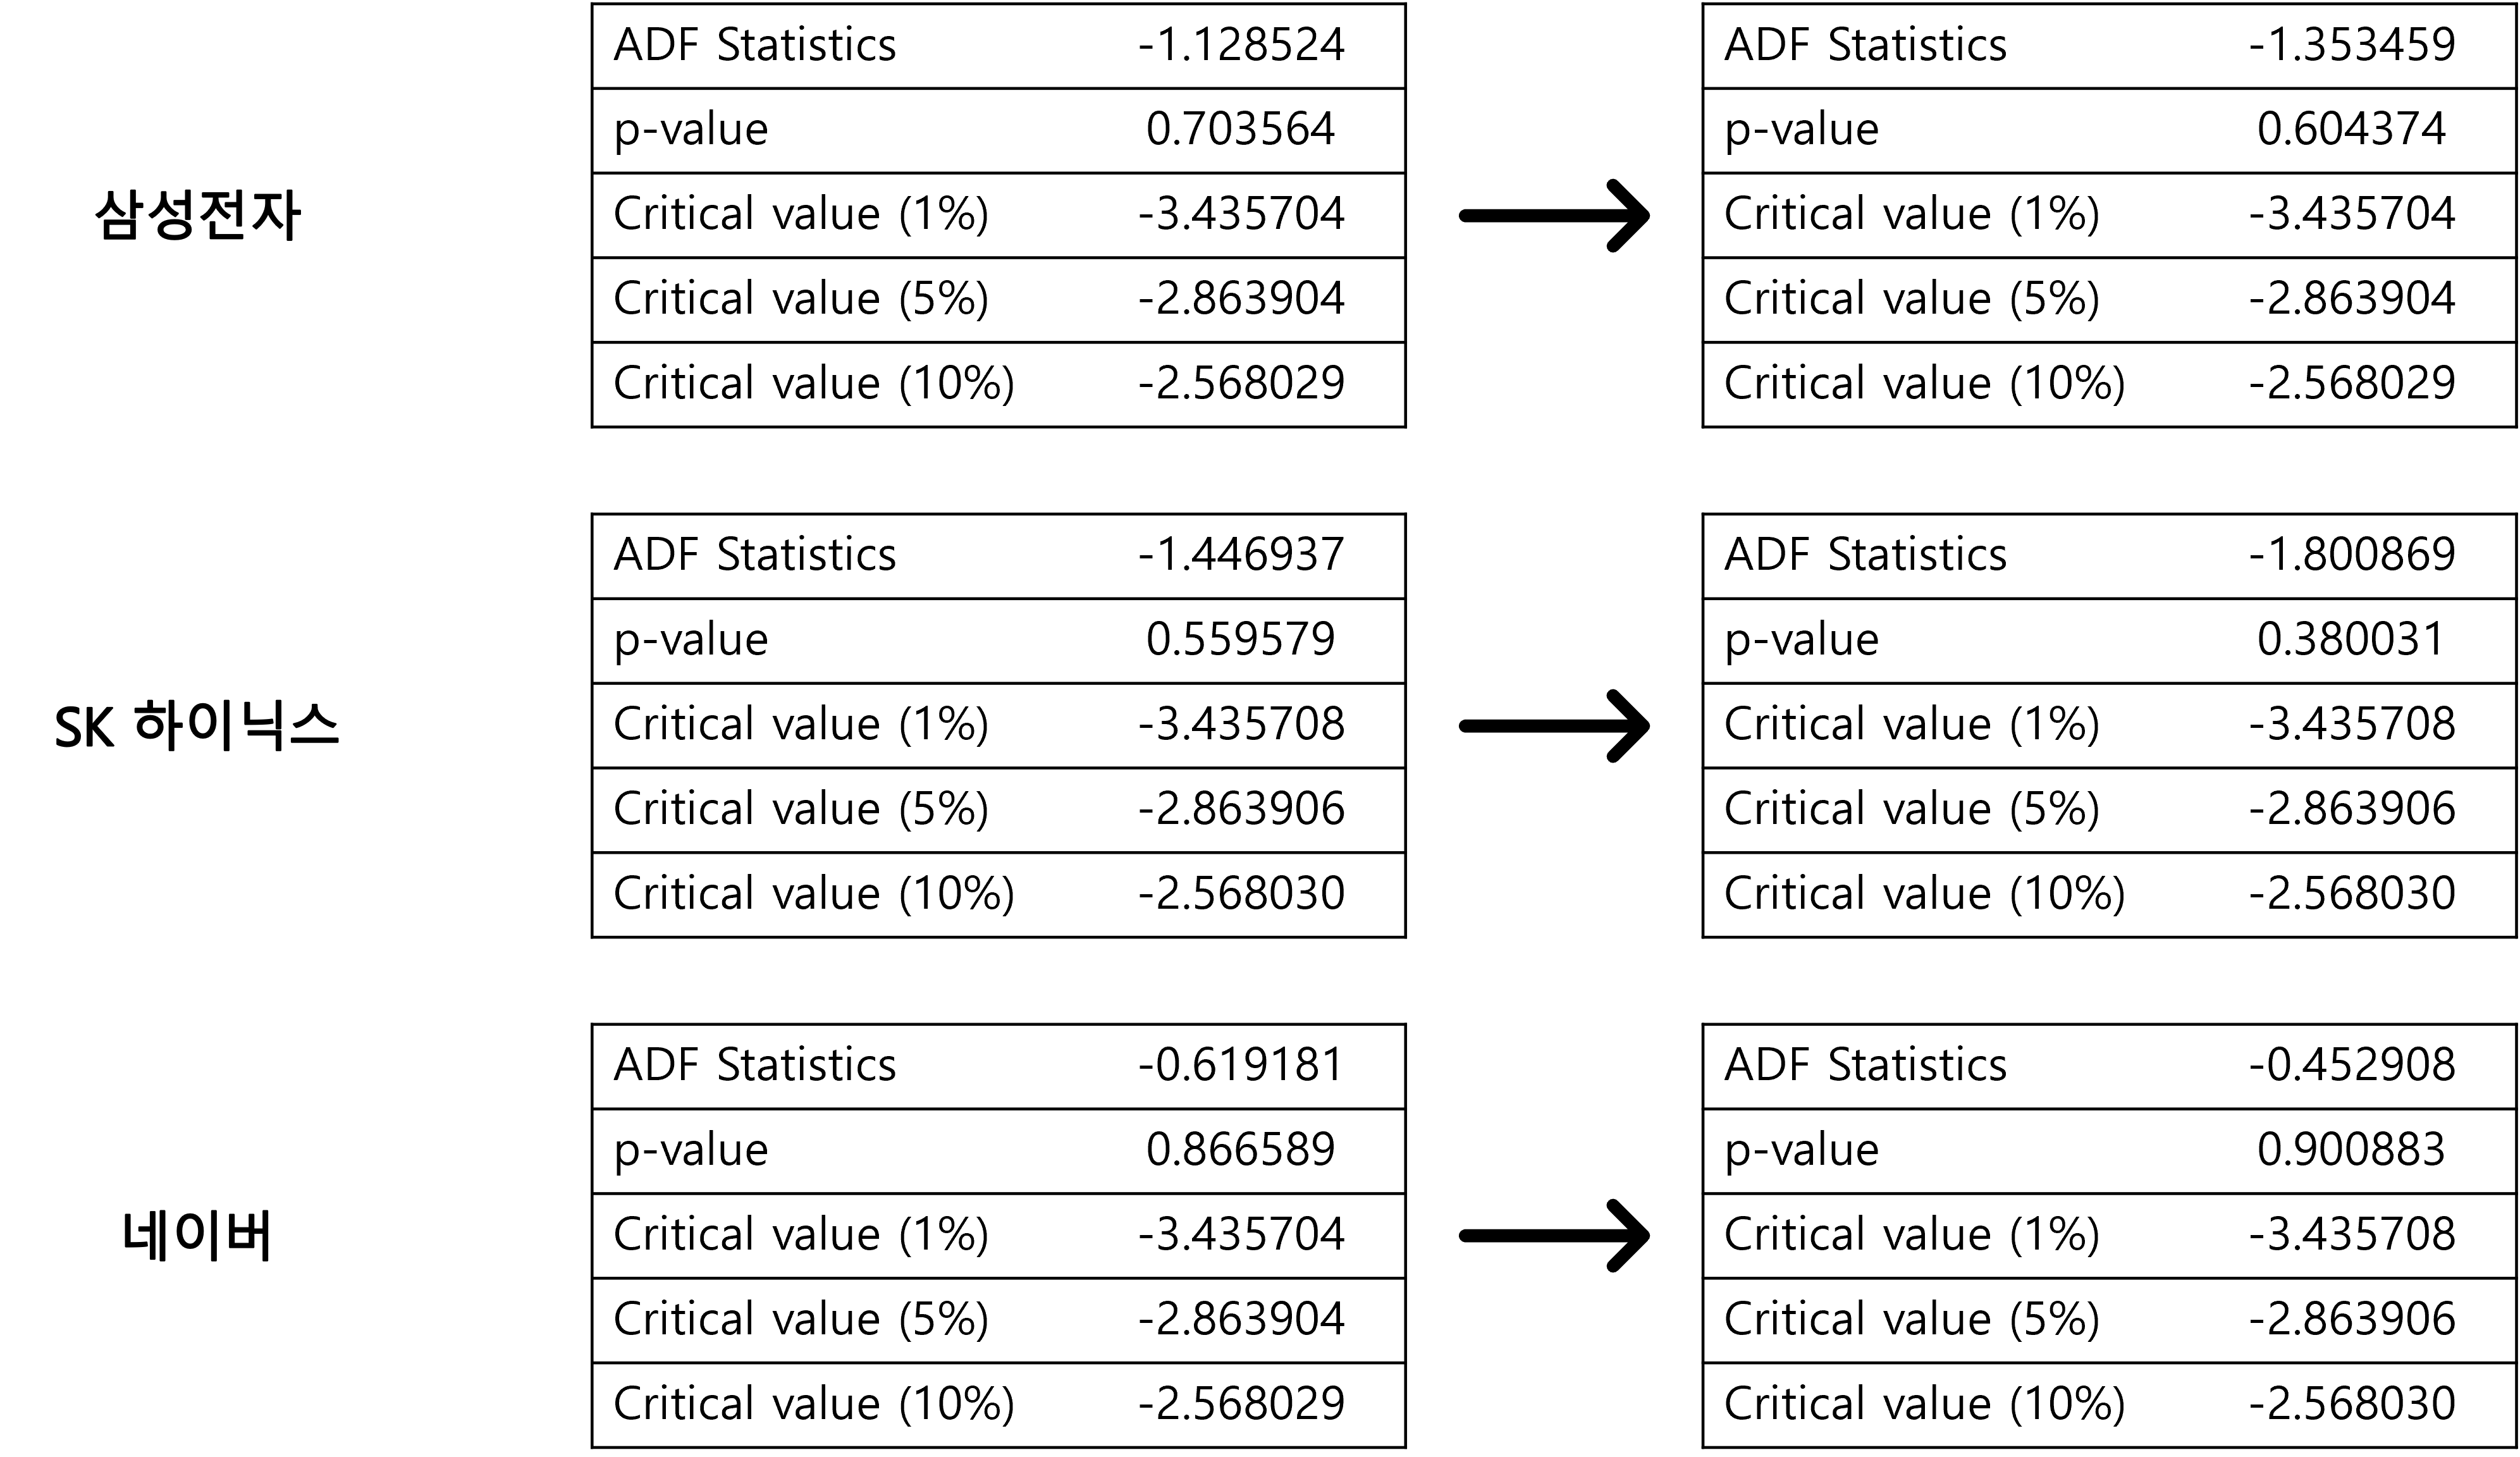

In [366]:
# 로그 변환 결과 요약
Image("log.png", width = 700)

* 삼성전자와 SK 하이닉스의 경우 ADF 검정통계량과, p-value가 모두 감소하는 긍정적인 영향이 있었지만,
* 네이버의 경우 ADF 검정통계량과, p-value가 모두 증가하는 부정적인 영향이 있었습니다.